# Fleet data per country

### 24h average

In [ ]:
# Create a copy of merged_data
merged_data_copy = merged_data.copy()

# Compute daily average of Value for each Pollutant per Country
daily_avg_per_country = (
    merged_data_copy.groupby(['Country', 'Pollutant', 'Start'])['Value']
    .mean()
    .reset_index()
    .rename(columns={'Value': 'DailyAverageValue'})
)

daily_avg_per_country

,Country,Pollutant,Start,DailyAverageValue
0,AT,5,2013-01-01 00:00:00,319.393036
1,AT,5,2013-01-01 01:00:00,297.272252
2,AT,5,2013-01-01 02:00:00,158.900503
3,AT,5,2013-01-01 03:00:00,86.559707
4,AT,5,2013-01-01 04:00:00,59.949791
...,...,...,...,...
2209673,NO,6001,2023-12-31 19:00:00,3.906768
2209674,NO,6001,2023-12-31 20:00:00,4.139576
2209675,NO,6001,2023-12-31 21:00:00,3.564156
2209676,NO,6001,2023-12-31 22:00:00,2.909819


In [ ]:
#summary statistics of daily average values
daily_avg_per_country.describe()

,Pollutant,Start,DailyAverageValue
count,2.209678e+06,2209678,2.209678e+06
mean,9.384940e+02,2019-02-05 11:19:44.730623488,-1.413213e+03
min,5.000000e+00,2008-12-31 23:00:00,-1.167965e+09
25%,7.000000e+00,2016-08-27 19:15:00,6.201582e+00
50%,8.000000e+00,2019-04-30 23:00:00,1.658283e+01
75%,3.800000e+01,2021-08-30 11:00:00,3.630217e+01
max,6.001000e+03,2023-12-31 23:00:00,1.183894e+09
std,2.163275e+03,NaN,1.573824e+06


In [ ]:
# don't think we need to get rid of outliers necessarily
#getting rid of outliers
Q1 = daily_avg_per_country['DailyAverageValue'].quantile(0.25)
Q3 = daily_avg_per_country['DailyAverageValue'].quantile(0.75)

IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

daily_avg_per_country = daily_avg_per_country[
    (daily_avg_per_country['DailyAverageValue'] >= lower_bound) &
    (daily_avg_per_country['DailyAverageValue'] <= upper_bound)
]

daily_avg_per_country

,Country,Pollutant,Start,DailyAverageValue
4,AT,5,2013-01-01 04:00:00,59.949791
5,AT,5,2013-01-01 05:00:00,52.924208
6,AT,5,2013-01-01 06:00:00,49.834083
7,AT,5,2013-01-01 07:00:00,49.908625
8,AT,5,2013-01-01 08:00:00,51.497500
...,...,...,...,...
2209673,NO,6001,2023-12-31 19:00:00,3.906768
2209674,NO,6001,2023-12-31 20:00:00,4.139576
2209675,NO,6001,2023-12-31 21:00:00,3.564156
2209676,NO,6001,2023-12-31 22:00:00,2.909819


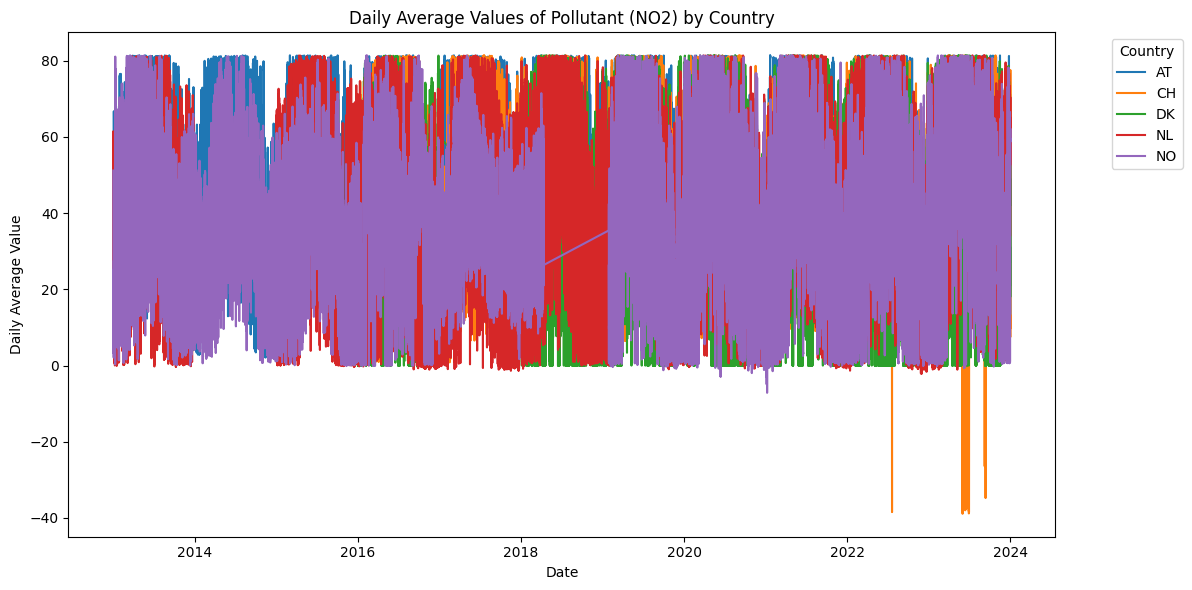

In [ ]:
import matplotlib.pyplot as plt

# Filter data for a specific pollutant (e.g., NO2) for better visualization
pollutant_to_visualize = 7 # NO2
filtered_data = daily_avg_per_country[daily_avg_per_country['Pollutant'] == pollutant_to_visualize]

# Plot the data
plt.figure(figsize=(12, 6))
for country in filtered_data['Country'].unique():
    country_data = filtered_data[filtered_data['Country'] == country]
    plt.plot(country_data['Start'], country_data['DailyAverageValue'], label=country)

plt.title('Daily Average Values of Pollutant (NO2) by Country')
plt.xlabel('Date')
plt.ylabel('Daily Average Value')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### Day-time avg

In [ ]:
# Filter data for day-time values (08:00:00 to 20:00:00)
day_time_data = merged_data[
    (merged_data['Start'].dt.time >= pd.to_datetime('08:00:00').time()) &
    (merged_data['Start'].dt.time <= pd.to_datetime('20:00:00').time())
]

# Compute daily mean for each pollutant value for each country
daily_daytime_avg_per_country = (
    day_time_data.groupby(['Country', 'Pollutant', day_time_data['Start'].dt.date])['Value']
    .mean()
    .reset_index()
    .rename(columns={'Start': 'Date', 'Value': 'DailyDaytimeAverageValue'})
)

daily_daytime_avg_per_country

,Country,Pollutant,Date,DailyDaytimeAverageValue
0,AT,5,2013-01-01,52.110413
1,AT,5,2013-01-02,25.221235
2,AT,5,2013-01-03,9.707832
3,AT,5,2013-01-04,9.635445
4,AT,5,2013-01-05,3.943111
...,...,...,...,...
92072,NO,6001,2023-12-27,-39.505708
92073,NO,6001,2023-12-28,7.945569
92074,NO,6001,2023-12-29,6.633458
92075,NO,6001,2023-12-30,10.783207


In [ ]:
#summary statistics
summary_stats = daily_daytime_avg_per_country['DailyDaytimeAverageValue'].describe()
print(summary_stats)

#remove outliers
Q1 = daily_daytime_avg_per_country['DailyDaytimeAverageValue'].quantile(0.25)
Q3 = daily_daytime_avg_per_country['DailyDaytimeAverageValue'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

daily_daytime_avg_per_country = daily_daytime_avg_per_country[
    (daily_daytime_avg_per_country['DailyDaytimeAverageValue'] >= lower_bound) &
    (daily_daytime_avg_per_country['DailyDaytimeAverageValue'] <= upper_bound)
]

daily_daytime_avg_per_country

count    9.207700e+04
mean    -1.309438e+03
std      4.640776e+05
min     -1.399059e+08
25%      6.921385e+00
50%      1.860801e+01
75%      4.005826e+01
max      1.245011e+07
Name: DailyDaytimeAverageValue, dtype: float64


,Country,Pollutant,Date,DailyDaytimeAverageValue
0,AT,5,2013-01-01,52.110413
1,AT,5,2013-01-02,25.221235
2,AT,5,2013-01-03,9.707832
3,AT,5,2013-01-04,9.635445
4,AT,5,2013-01-05,3.943111
...,...,...,...,...
92072,NO,6001,2023-12-27,-39.505708
92073,NO,6001,2023-12-28,7.945569
92074,NO,6001,2023-12-29,6.633458
92075,NO,6001,2023-12-30,10.783207


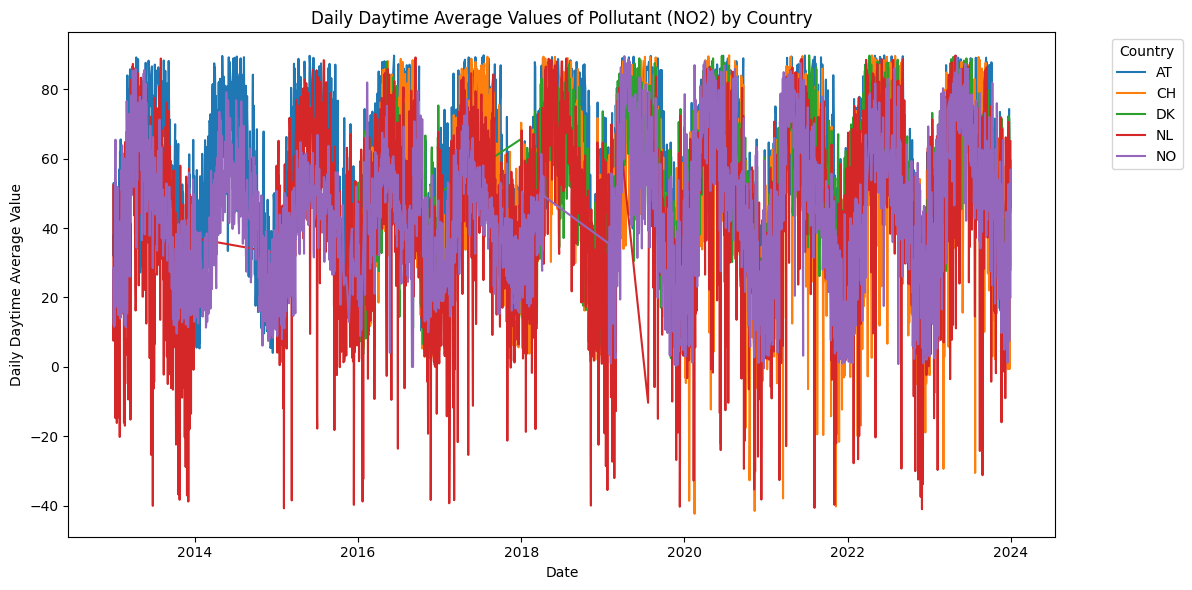

In [ ]:
import matplotlib.pyplot as plt

# Filter data for a specific pollutant (e.g., NO2) for better visualization
pollutant_to_visualize = 7  # NO2
filtered_data = daily_daytime_avg_per_country[daily_daytime_avg_per_country['Pollutant'] == pollutant_to_visualize]

# Plot the data
plt.figure(figsize=(12, 6))
for country in filtered_data['Country'].unique():
    country_data = filtered_data[filtered_data['Country'] == country]
    plt.plot(country_data['Date'], country_data['DailyDaytimeAverageValue'], label=country)

plt.title('Daily Daytime Average Values of Pollutant (NO2) by Country')
plt.xlabel('Date')
plt.ylabel('Daily Daytime Average Value')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### Peak-traffic hour windows

In [ ]:
# Filter data for the specified time ranges
peak_traffic_data = merged_data[
    ((merged_data['Start'].dt.time >= pd.to_datetime('06:00:00').time()) & 
     (merged_data['Start'].dt.time <= pd.to_datetime('10:00:00').time())) |
    ((merged_data['Start'].dt.time >= pd.to_datetime('16:00:00').time()) & 
     (merged_data['Start'].dt.time <= pd.to_datetime('20:00:00').time()))
]

# Compute daily mean for each pollutant value for each country
daily_peak_traffic_avg_per_country = (
    peak_traffic_data.groupby(['Country', 'Pollutant', peak_traffic_data['Start'].dt.date])['Value']
    .mean()
    .reset_index()
    .rename(columns={'Start': 'Date', 'Value': 'DailyPeakTrafficAverageValue'})
)

daily_peak_traffic_avg_per_country

,Country,Pollutant,Date,DailyPeakTrafficAverageValue
0,AT,5,2013-01-01,51.586312
1,AT,5,2013-01-02,31.677111
2,AT,5,2013-01-03,12.501949
3,AT,5,2013-01-04,8.393159
4,AT,5,2013-01-05,3.950906
...,...,...,...,...
92073,NO,6001,2023-12-27,22.545110
92074,NO,6001,2023-12-28,9.120578
92075,NO,6001,2023-12-29,7.111636
92076,NO,6001,2023-12-30,9.878856


In [ ]:
# Generate summary statistics
summary_stats = daily_peak_traffic_avg_per_country['DailyPeakTrafficAverageValue'].describe()
print(summary_stats)

# Remove outliers using the IQR method
Q1 = daily_peak_traffic_avg_per_country['DailyPeakTrafficAverageValue'].quantile(0.25)
Q3 = daily_peak_traffic_avg_per_country['DailyPeakTrafficAverageValue'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

daily_peak_traffic_avg_per_country = daily_peak_traffic_avg_per_country[
    (daily_peak_traffic_avg_per_country['DailyPeakTrafficAverageValue'] >= lower_bound) &
    (daily_peak_traffic_avg_per_country['DailyPeakTrafficAverageValue'] <= upper_bound)
]

daily_peak_traffic_avg_per_country

count    9.207800e+04
mean    -3.375996e+02
std      1.958049e+05
min     -5.595444e+07
25%      7.274157e+00
50%      1.918641e+01
75%      4.003498e+01
max      1.552745e+07
Name: DailyPeakTrafficAverageValue, dtype: float64


,Country,Pollutant,Date,DailyPeakTrafficAverageValue
0,AT,5,2013-01-01,51.586312
1,AT,5,2013-01-02,31.677111
2,AT,5,2013-01-03,12.501949
3,AT,5,2013-01-04,8.393159
4,AT,5,2013-01-05,3.950906
...,...,...,...,...
92073,NO,6001,2023-12-27,22.545110
92074,NO,6001,2023-12-28,9.120578
92075,NO,6001,2023-12-29,7.111636
92076,NO,6001,2023-12-30,9.878856


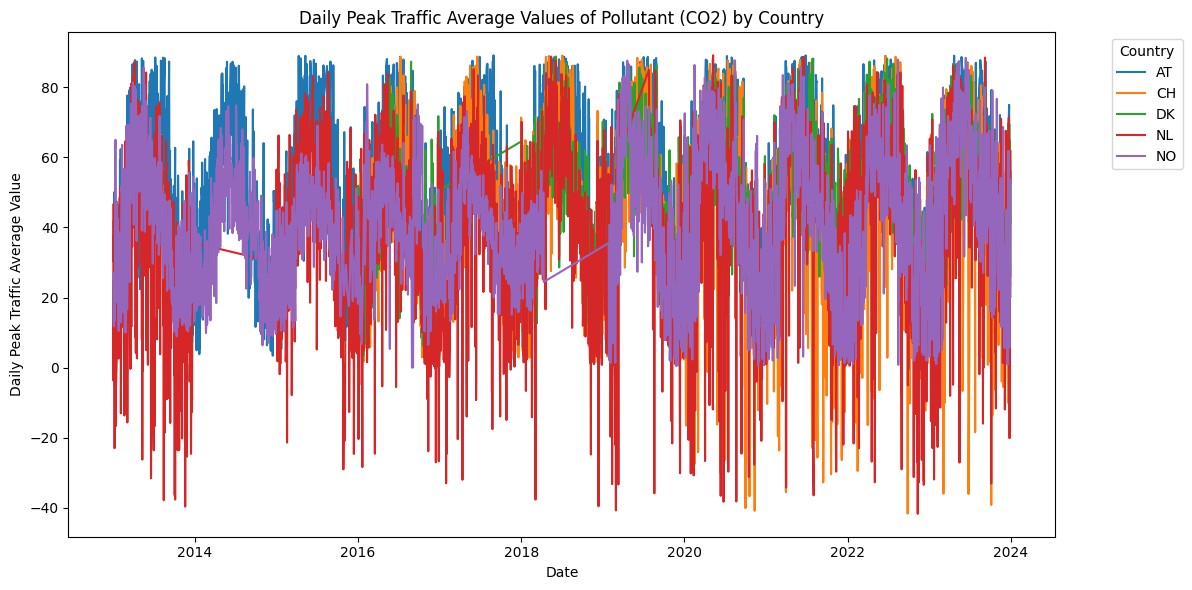

In [ ]:
# Filter data for a specific pollutant (e.g., NO2) for better visualization
pollutant_to_visualize = 7 # CO2
filtered_data = daily_peak_traffic_avg_per_country[daily_peak_traffic_avg_per_country['Pollutant'] == pollutant_to_visualize]

# Plot the data
plt.figure(figsize=(12, 6))
for country in filtered_data['Country'].unique():
    country_data = filtered_data[filtered_data['Country'] == country]
    plt.plot(country_data['Date'], country_data['DailyPeakTrafficAverageValue'], label=country)

plt.title('Daily Peak Traffic Average Values of Pollutant (CO2) by Country')
plt.xlabel('Date')
plt.ylabel('Daily Peak Traffic Average Value')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

All data sourced from the European Alternative Fuels (AF) Observatory:

[country_identifier]_psg_vehicle_fleetdata:
AF Fleet percentage of total fleet (M1)
Fleet of alternative fuelled (BEV, PHEV, H2, LPG, CNG, LNG) passenger cars as a percentage of the total fleet.

[country_identifier]_psg_vehicle_fleetdata:
AF New registrations (M1)
Number of newly registered alternative fuelled (BEV, PHEV, H2, LPG, CNG, LNG) passenger cars (M1).

[country_identifier]_psg_vehicle_fleetdata:
AF Market share of total registrations (M1)
Newly registered alternative fuelled (BEV, PHEV, H2, LPG, CNG, LNG) passenger cars as a percentage of the total number of registrations.

In [1]:
import pandas as pd
import os

# Debug: Check the current working directory
print("Current Working Directory:", os.getcwd())

# Set the path to the raw data folder
data_path = "../data/raw/fleet_data"  # Relative path to the raw data folder

# Verify if the path exists
if not os.path.exists(data_path):
    print(f"Relative path '{data_path}' not found. Using absolute path instead.")
    data_path = "c:/Users/jskif/OneDrive - epfl.ch/Documents/SMT/DSML/DSML/data/raw"

# List all CSV files in the raw data folder
csv_files = [file for file in os.listdir(data_path) if file.endswith(".csv")]

# Initialize dictionaries to store DataFrames for each file type
newreg_dataframes = {}
eu_dataframes = {}
registrations_dataframes = {}

# Process files based on their type
for file in csv_files:
    country_name = file.split("_")[0]  # Extract country name from the file name
    file_path = os.path.join(data_path, file)

    if file.endswith("newreg.csv"):
        newreg_dataframes[country_name] = pd.read_csv(file_path)
    elif file.endswith("EU.csv"):
        eu_dataframes[country_name] = pd.read_csv(file_path)
    elif file.endswith("registrations.csv"):
        registrations_dataframes[country_name] = pd.read_csv(file_path)

# Combine datasets for each file type
combined_newreg_df = pd.concat(newreg_dataframes.values(), keys=newreg_dataframes.keys(), names=["Country", "Index"]).reset_index()
combined_fleet_df = pd.concat(eu_dataframes.values(), keys=eu_dataframes.keys(), names=["Country", "Index"]).reset_index()
combined_registrations_mktshare_df = pd.concat(registrations_dataframes.values(), keys=registrations_dataframes.keys(), names=["Country", "Index"]).reset_index()

# Display basic information about the combined datasets
print("Combined New Registrations Dataset Info:")
print(combined_newreg_df.info())

print("\nCombined EU Dataset Info:")
print(combined_fleet_df.info())

print("\nCombined Registrations Dataset Info:")
print(combined_registrations_mktshare_df.info())

# Change the name of the Category column in each file to "Year"
combined_newreg_df.rename(columns={"Category": "Year"}, inplace=True)
combined_fleet_df.rename(columns={"Category": "Year"}, inplace=True)
combined_registrations_mktshare_df.rename(columns={"Category": "Year"}, inplace=True)

# Save the combined datasets to the processed folder
processed_path = "../data/processed"
os.makedirs(processed_path, exist_ok=True)

combined_newreg_df.to_csv(os.path.join(processed_path, "combined_newreg_data.csv"), index=False)
combined_fleet_df.to_csv(os.path.join(processed_path, "combined_fleet_data.csv"), index=False)
combined_registrations_mktshare_df.to_csv(os.path.join(processed_path, "combined_registrations_mktshare_data.csv"), index=False)

print(f"Combined datasets saved to {processed_path}/")  

Current Working Directory: c:\Users\jskif\OneDrive - epfl.ch\Documents\SMT\DSML\DSML\src
Combined New Registrations Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Country   108 non-null    object 
 1   Index     108 non-null    int64  
 2   Category  108 non-null    int64  
 3   BEV       108 non-null    int64  
 4   PHEV      108 non-null    int64  
 5   H2        73 non-null     float64
 6   LPG       39 non-null     float64
 7   CNG       85 non-null     float64
 8   LNG       0 non-null      float64
dtypes: float64(4), int64(4), object(1)
memory usage: 7.7+ KB
None

Combined EU Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Country   96 non-null     object 
 1   Index     96 non-nu

In [3]:
import pandas as pd
import os

data_dir = "../data/processed"
output_dir = "../results"

def prepare_vehicle_data(filename, bev_col='BEV', af_cols=['BEV','PHEV','H2','LPG','CNG','LNG'], suffix=''):
    df = pd.read_csv(os.path.join(data_dir, filename))
    # Ensure columns exist
    cols = [c for c in af_cols if c in df.columns]
    # Group by Country, Year and sum/mean as appropriate
    group_cols = ['Country', 'Year']
    agg_df = df.groupby(group_cols)[cols].sum().reset_index()
    # Create AF column
    agg_df[f'AF{suffix}'] = agg_df[cols].sum(axis=1)
    # Keep only BEV and AF
    out = agg_df[group_cols + [bev_col, f'AF{suffix}']]
    out = out.rename(columns={bev_col: f'BEV{suffix}'})
    return out

# Prepare each vehicle dataset
fleet = prepare_vehicle_data("combined_fleet_data.csv", suffix='_fleet')
newreg = prepare_vehicle_data("combined_newreg_data.csv", suffix='_newreg')
mktshare = prepare_vehicle_data("combined_registrations_mktshare_data.csv", suffix='_mktshare')

# Merge all into one
vehicle_data = fleet.merge(newreg, on=['Country','Year']).merge(mktshare, on=['Country','Year'])
vehicle_data.to_csv(os.path.join(data_dir, "combined_vehicle_data.csv"), index=False)

# Air quality (AQ) data pre-processing (done locally, files too large for GitHub)

In [ ]:
pip install pandas pyarrow
import pandas as pd
import os

input_folder = "/Users/clarabottinelli/Desktop/PQ_downloads"
output_folder = "/Users/clarabottinelli/Desktop/CSV_downloads"

for file in os.listdir(input_folder):
    if file.endswith(".parquet"):
        df = pd.read_parquet(os.path.join(input_folder, file))
        csv_filename = file.replace(".parquet", ".csv")
        df.to_csv(os.path.join(output_folder, csv_filename), index=False)


In [ ]:
samplingpoint_data = {}

for csv_file in os.listdir(output_folder):
    if csv_file.endswith(".csv"):
        file_path = os.path.join(output_folder, csv_file)
        df = pd.read_csv(file_path)
        
        #group dataframe by Samplingpoint
        for samplingpoint, group in df.groupby("Samplingpoint"):
            if samplingpoint not in samplingpoint_data:
                samplingpoint_data[samplingpoint] = group
            else:
                samplingpoint_data[samplingpoint] = pd.concat([samplingpoint_data[samplingpoint], group], ignore_index=True)

#merge dataframe with datapoints for all Samplingpoints
merged_data = pd.concat(samplingpoint_data.values(), ignore_index=True)
merged_data

,Samplingpoint,Pollutant,Start,End,Value,Unit,AggType,Validity,Verification,ResultTime,DataCapture,FkObservationLog
0,NO/SPO_NO0073A_38_1785,38,2019-01-01 00:00:00,2019-01-01 01:00:00,-9900.0000,ug.m-3,hour,-1,1,2020-09-29 11:41:48,NaN,0fc404b0-e3c3-4118-bb62-c80ccfbb99a4
1,NO/SPO_NO0073A_38_1785,38,2019-01-01 01:00:00,2019-01-01 02:00:00,-9900.0000,ug.m-3,hour,-1,1,2020-09-29 11:41:48,NaN,0fc404b0-e3c3-4118-bb62-c80ccfbb99a4
2,NO/SPO_NO0073A_38_1785,38,2019-01-01 02:00:00,2019-01-01 03:00:00,-9900.0000,ug.m-3,hour,-1,1,2020-09-29 11:41:48,NaN,0fc404b0-e3c3-4118-bb62-c80ccfbb99a4
3,NO/SPO_NO0073A_38_1785,38,2019-01-01 03:00:00,2019-01-01 04:00:00,-9900.0000,ug.m-3,hour,-1,1,2020-09-29 11:41:48,NaN,0fc404b0-e3c3-4118-bb62-c80ccfbb99a4
4,NO/SPO_NO0073A_38_1785,38,2019-01-01 04:00:00,2019-01-01 05:00:00,-9900.0000,ug.m-3,hour,-1,1,2020-09-29 11:41:48,NaN,0fc404b0-e3c3-4118-bb62-c80ccfbb99a4
...,...,...,...,...,...,...,...,...,...,...,...,...
14847174,NL/SPO-NL00003_00009_101,9,2023-12-31 19:00:00,2023-12-31 20:00:00,5.4933,ug.m-3,hour,1,1,2024-12-11 14:58:11,NaN,ace1e0cc-9206-461d-a4b3-c9b0085599bd
14847175,NL/SPO-NL00003_00009_101,9,2023-12-31 20:00:00,2023-12-31 21:00:00,4.9933,ug.m-3,hour,1,1,2024-12-11 14:58:11,NaN,ace1e0cc-9206-461d-a4b3-c9b0085599bd
14847176,NL/SPO-NL00003_00009_101,9,2023-12-31 21:00:00,2023-12-31 22:00:00,5.6933,ug.m-3,hour,1,1,2024-12-11 14:58:11,NaN,ace1e0cc-9206-461d-a4b3-c9b0085599bd
14847177,NL/SPO-NL00003_00009_101,9,2023-12-31 22:00:00,2023-12-31 23:00:00,5.3933,ug.m-3,hour,1,1,2024-12-11 14:58:11,NaN,ace1e0cc-9206-461d-a4b3-c9b0085599bd


### Cleaning dataset

In [ ]:
#identify pollutants corresponding to IDs used by EEA
pollutant_codes = {
    5: "NO",
    7: "CO2",
    8: "NO2",
    9: "PM2.5",
    38: "PM10",
    6001: "NOX as NO2"
}

merged_data['Notation'] = merged_data['Pollutant'].map(pollutant_codes)
merged_data

,Samplingpoint,Pollutant,Start,End,Value,Unit,AggType,Validity,Verification,ResultTime,DataCapture,FkObservationLog,Notation
0,NO/SPO_NO0073A_38_1785,38,2019-01-01 00:00:00,2019-01-01 01:00:00,-9900.0000,ug.m-3,hour,-1,1,2020-09-29 11:41:48,NaN,0fc404b0-e3c3-4118-bb62-c80ccfbb99a4,PM10
1,NO/SPO_NO0073A_38_1785,38,2019-01-01 01:00:00,2019-01-01 02:00:00,-9900.0000,ug.m-3,hour,-1,1,2020-09-29 11:41:48,NaN,0fc404b0-e3c3-4118-bb62-c80ccfbb99a4,PM10
2,NO/SPO_NO0073A_38_1785,38,2019-01-01 02:00:00,2019-01-01 03:00:00,-9900.0000,ug.m-3,hour,-1,1,2020-09-29 11:41:48,NaN,0fc404b0-e3c3-4118-bb62-c80ccfbb99a4,PM10
3,NO/SPO_NO0073A_38_1785,38,2019-01-01 03:00:00,2019-01-01 04:00:00,-9900.0000,ug.m-3,hour,-1,1,2020-09-29 11:41:48,NaN,0fc404b0-e3c3-4118-bb62-c80ccfbb99a4,PM10
4,NO/SPO_NO0073A_38_1785,38,2019-01-01 04:00:00,2019-01-01 05:00:00,-9900.0000,ug.m-3,hour,-1,1,2020-09-29 11:41:48,NaN,0fc404b0-e3c3-4118-bb62-c80ccfbb99a4,PM10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14847174,NL/SPO-NL00003_00009_101,9,2023-12-31 19:00:00,2023-12-31 20:00:00,5.4933,ug.m-3,hour,1,1,2024-12-11 14:58:11,NaN,ace1e0cc-9206-461d-a4b3-c9b0085599bd,PM2.5
14847175,NL/SPO-NL00003_00009_101,9,2023-12-31 20:00:00,2023-12-31 21:00:00,4.9933,ug.m-3,hour,1,1,2024-12-11 14:58:11,NaN,ace1e0cc-9206-461d-a4b3-c9b0085599bd,PM2.5
14847176,NL/SPO-NL00003_00009_101,9,2023-12-31 21:00:00,2023-12-31 22:00:00,5.6933,ug.m-3,hour,1,1,2024-12-11 14:58:11,NaN,ace1e0cc-9206-461d-a4b3-c9b0085599bd,PM2.5
14847177,NL/SPO-NL00003_00009_101,9,2023-12-31 22:00:00,2023-12-31 23:00:00,5.3933,ug.m-3,hour,1,1,2024-12-11 14:58:11,NaN,ace1e0cc-9206-461d-a4b3-c9b0085599bd,PM2.5


In [ ]:
print(merged_data['Pollutant'].unique())

[  38    8    7    5 6001    9]


In [ ]:
#convert Start column to datetime and drop rows with NaT values
if not pd.api.types.is_datetime64_any_dtype(merged_data['Start']):
    merged_data['Start'] = pd.to_datetime(merged_data['Start'], errors='coerce', infer_datetime_format=True)

merged_data = merged_data.dropna(subset=['Start'])
merged_data

/var/folders/c8/hcty8r1j2xj189pdz208fpnr0000gn/T/ipykernel_81053/1018579409.py:3: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  merged_data['Start'] = pd.to_datetime(merged_data['Start'], errors='coerce', infer_datetime_format=True)


,Samplingpoint,Pollutant,Start,End,Value,Unit,AggType,Validity,Verification,ResultTime,DataCapture,FkObservationLog,Notation
0,NO/SPO_NO0073A_38_1785,38,2019-01-01 00:00:00,2019-01-01 01:00:00,-9900.0000,ug.m-3,hour,-1,1,2020-09-29 11:41:48,NaN,0fc404b0-e3c3-4118-bb62-c80ccfbb99a4,PM10
1,NO/SPO_NO0073A_38_1785,38,2019-01-01 01:00:00,2019-01-01 02:00:00,-9900.0000,ug.m-3,hour,-1,1,2020-09-29 11:41:48,NaN,0fc404b0-e3c3-4118-bb62-c80ccfbb99a4,PM10
2,NO/SPO_NO0073A_38_1785,38,2019-01-01 02:00:00,2019-01-01 03:00:00,-9900.0000,ug.m-3,hour,-1,1,2020-09-29 11:41:48,NaN,0fc404b0-e3c3-4118-bb62-c80ccfbb99a4,PM10
3,NO/SPO_NO0073A_38_1785,38,2019-01-01 03:00:00,2019-01-01 04:00:00,-9900.0000,ug.m-3,hour,-1,1,2020-09-29 11:41:48,NaN,0fc404b0-e3c3-4118-bb62-c80ccfbb99a4,PM10
4,NO/SPO_NO0073A_38_1785,38,2019-01-01 04:00:00,2019-01-01 05:00:00,-9900.0000,ug.m-3,hour,-1,1,2020-09-29 11:41:48,NaN,0fc404b0-e3c3-4118-bb62-c80ccfbb99a4,PM10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14847174,NL/SPO-NL00003_00009_101,9,2023-12-31 19:00:00,2023-12-31 20:00:00,5.4933,ug.m-3,hour,1,1,2024-12-11 14:58:11,NaN,ace1e0cc-9206-461d-a4b3-c9b0085599bd,PM2.5
14847175,NL/SPO-NL00003_00009_101,9,2023-12-31 20:00:00,2023-12-31 21:00:00,4.9933,ug.m-3,hour,1,1,2024-12-11 14:58:11,NaN,ace1e0cc-9206-461d-a4b3-c9b0085599bd,PM2.5
14847176,NL/SPO-NL00003_00009_101,9,2023-12-31 21:00:00,2023-12-31 22:00:00,5.6933,ug.m-3,hour,1,1,2024-12-11 14:58:11,NaN,ace1e0cc-9206-461d-a4b3-c9b0085599bd,PM2.5
14847177,NL/SPO-NL00003_00009_101,9,2023-12-31 22:00:00,2023-12-31 23:00:00,5.3933,ug.m-3,hour,1,1,2024-12-11 14:58:11,NaN,ace1e0cc-9206-461d-a4b3-c9b0085599bd,PM2.5


In [ ]:
#aggregate sampling points by country
merged_data.insert(0, 'Country', merged_data['Samplingpoint'].str[:2])
merged_data

,Country,Samplingpoint,Pollutant,Start,End,Value,Unit,AggType,Validity,Verification,ResultTime,DataCapture,FkObservationLog,Notation
0,NO,NO/SPO_NO0073A_38_1785,38,2019-01-01 00:00:00,2019-01-01 01:00:00,-9900.0000,ug.m-3,hour,-1,1,2020-09-29 11:41:48,NaN,0fc404b0-e3c3-4118-bb62-c80ccfbb99a4,PM10
1,NO,NO/SPO_NO0073A_38_1785,38,2019-01-01 01:00:00,2019-01-01 02:00:00,-9900.0000,ug.m-3,hour,-1,1,2020-09-29 11:41:48,NaN,0fc404b0-e3c3-4118-bb62-c80ccfbb99a4,PM10
2,NO,NO/SPO_NO0073A_38_1785,38,2019-01-01 02:00:00,2019-01-01 03:00:00,-9900.0000,ug.m-3,hour,-1,1,2020-09-29 11:41:48,NaN,0fc404b0-e3c3-4118-bb62-c80ccfbb99a4,PM10
3,NO,NO/SPO_NO0073A_38_1785,38,2019-01-01 03:00:00,2019-01-01 04:00:00,-9900.0000,ug.m-3,hour,-1,1,2020-09-29 11:41:48,NaN,0fc404b0-e3c3-4118-bb62-c80ccfbb99a4,PM10
4,NO,NO/SPO_NO0073A_38_1785,38,2019-01-01 04:00:00,2019-01-01 05:00:00,-9900.0000,ug.m-3,hour,-1,1,2020-09-29 11:41:48,NaN,0fc404b0-e3c3-4118-bb62-c80ccfbb99a4,PM10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14847174,NL,NL/SPO-NL00003_00009_101,9,2023-12-31 19:00:00,2023-12-31 20:00:00,5.4933,ug.m-3,hour,1,1,2024-12-11 14:58:11,NaN,ace1e0cc-9206-461d-a4b3-c9b0085599bd,PM2.5
14847175,NL,NL/SPO-NL00003_00009_101,9,2023-12-31 20:00:00,2023-12-31 21:00:00,4.9933,ug.m-3,hour,1,1,2024-12-11 14:58:11,NaN,ace1e0cc-9206-461d-a4b3-c9b0085599bd,PM2.5
14847176,NL,NL/SPO-NL00003_00009_101,9,2023-12-31 21:00:00,2023-12-31 22:00:00,5.6933,ug.m-3,hour,1,1,2024-12-11 14:58:11,NaN,ace1e0cc-9206-461d-a4b3-c9b0085599bd,PM2.5
14847177,NL,NL/SPO-NL00003_00009_101,9,2023-12-31 22:00:00,2023-12-31 23:00:00,5.3933,ug.m-3,hour,1,1,2024-12-11 14:58:11,NaN,ace1e0cc-9206-461d-a4b3-c9b0085599bd,PM2.5


In [ ]:
print(merged_data['Country'].value_counts())

Country
AT    4374113
NO    4167809
NL    3541104
CH    1972275
DK     712692
Name: count, dtype: int64


In [ ]:
#drop unnecessary columns
merged_data = merged_data.drop(columns=['ResultTime', 'DataCapture', 'FkObservationLog', 'Validity', 'Verification'])
# rename Notation column to Pollutant and remove pollutant column
merged_data = merged_data.rename(columns={'Notation': 'Pollutant'})
merged_data = merged_data.drop(columns=['Pollutant'])
merged_data

,Country,Samplingpoint,Pollutant,Start,End,Value,Unit,AggType,Notation
0,NO,NO/SPO_NO0073A_38_1785,38,2019-01-01 00:00:00,2019-01-01 01:00:00,-9900.0000,ug.m-3,hour,PM10
1,NO,NO/SPO_NO0073A_38_1785,38,2019-01-01 01:00:00,2019-01-01 02:00:00,-9900.0000,ug.m-3,hour,PM10
2,NO,NO/SPO_NO0073A_38_1785,38,2019-01-01 02:00:00,2019-01-01 03:00:00,-9900.0000,ug.m-3,hour,PM10
3,NO,NO/SPO_NO0073A_38_1785,38,2019-01-01 03:00:00,2019-01-01 04:00:00,-9900.0000,ug.m-3,hour,PM10
4,NO,NO/SPO_NO0073A_38_1785,38,2019-01-01 04:00:00,2019-01-01 05:00:00,-9900.0000,ug.m-3,hour,PM10
...,...,...,...,...,...,...,...,...,...
14847174,NL,NL/SPO-NL00003_00009_101,9,2023-12-31 19:00:00,2023-12-31 20:00:00,5.4933,ug.m-3,hour,PM2.5
14847175,NL,NL/SPO-NL00003_00009_101,9,2023-12-31 20:00:00,2023-12-31 21:00:00,4.9933,ug.m-3,hour,PM2.5
14847176,NL,NL/SPO-NL00003_00009_101,9,2023-12-31 21:00:00,2023-12-31 22:00:00,5.6933,ug.m-3,hour,PM2.5
14847177,NL,NL/SPO-NL00003_00009_101,9,2023-12-31 22:00:00,2023-12-31 23:00:00,5.3933,ug.m-3,hour,PM2.5


In [ ]:
merged_data

,Country,Samplingpoint,Pollutant,Start,End,Value,Unit,AggType,Notation
0,NO,NO/SPO_NO0073A_38_1785,38,2019-01-01 00:00:00,2019-01-01 01:00:00,-9900.0000,ug.m-3,hour,PM10
1,NO,NO/SPO_NO0073A_38_1785,38,2019-01-01 01:00:00,2019-01-01 02:00:00,-9900.0000,ug.m-3,hour,PM10
2,NO,NO/SPO_NO0073A_38_1785,38,2019-01-01 02:00:00,2019-01-01 03:00:00,-9900.0000,ug.m-3,hour,PM10
3,NO,NO/SPO_NO0073A_38_1785,38,2019-01-01 03:00:00,2019-01-01 04:00:00,-9900.0000,ug.m-3,hour,PM10
4,NO,NO/SPO_NO0073A_38_1785,38,2019-01-01 04:00:00,2019-01-01 05:00:00,-9900.0000,ug.m-3,hour,PM10
...,...,...,...,...,...,...,...,...,...
14847174,NL,NL/SPO-NL00003_00009_101,9,2023-12-31 19:00:00,2023-12-31 20:00:00,5.4933,ug.m-3,hour,PM2.5
14847175,NL,NL/SPO-NL00003_00009_101,9,2023-12-31 20:00:00,2023-12-31 21:00:00,4.9933,ug.m-3,hour,PM2.5
14847176,NL,NL/SPO-NL00003_00009_101,9,2023-12-31 21:00:00,2023-12-31 22:00:00,5.6933,ug.m-3,hour,PM2.5
14847177,NL,NL/SPO-NL00003_00009_101,9,2023-12-31 22:00:00,2023-12-31 23:00:00,5.3933,ug.m-3,hour,PM2.5


### Cleaning dataset

# Air quality (AQ) cleaning 

In [ ]:
output_csv_path = os.path.join(output_folder, "merged_data_export.csv")
merged_data.to_csv(output_csv_path, index=False)
print(f"Exported merged_data to {output_csv_path}")

Exported merged_data to /Users/clarabottinelli/Desktop/CSV_downloads/merged_data_export.csv


In [4]:
import pandas as pd
import numpy as np

# Load the merged air quality data
aq_df = pd.read_csv("../data/processed/AQ_merged_data_export.csv")

# Drop unnecessary columns
aq_cleaned = aq_df.drop(columns=['Samplingpoint', 'Pollutant', 'AggType'], errors='ignore')

# Keep only the 'End' column for datetime
aq_cleaned = aq_cleaned.rename(columns={'End': 'Datetime'})
if 'Start' in aq_cleaned.columns:
    aq_cleaned = aq_cleaned.drop(columns=['Start'])

# Convert 'Datetime' to pandas datetime
aq_cleaned['Datetime'] = pd.to_datetime(aq_cleaned['Datetime'], errors='coerce')
aq_cleaned = aq_cleaned.dropna(subset=['Datetime'])

# Extract date and hour for grouping
aq_cleaned['Date'] = aq_cleaned['Datetime'].dt.date
aq_cleaned['Hour'] = aq_cleaned['Datetime'].dt.hour

In [5]:
# Count NaN values for each Country and Notation
nan_counts = aq_cleaned.groupby(['Country', 'Notation'])['Value'].apply(lambda x: x.isna().sum()).reset_index(name='NaN_Count')

# Count negative values for each Country and Notation
neg_counts = aq_cleaned.groupby(['Country', 'Notation'])['Value'].apply(lambda x: (x < 0).sum()).reset_index(name='Negative_Count')

# Merge the two counts
value_issues = nan_counts.merge(neg_counts, on=['Country', 'Notation'])
print(value_issues)

   Country    Notation  NaN_Count  Negative_Count
0       AT         CO2          0              30
1       AT          NO          0               0
2       AT         NO2          0              34
3       AT  NOX as NO2          0               0
4       AT        PM10          0           14258
5       CH         CO2          0            2520
6       CH         NO2          0            2397
7       CH        PM10          0            4196
8       CH       PM2.5          0            2395
9       DK         CO2          0              33
10      DK          NO          0               0
11      DK         NO2          0              59
12      DK  NOX as NO2          0               9
13      DK        PM10          0            3871
14      DK       PM2.5          0              19
15      NL         CO2          0            9529
16      NL          NO          0           21599
17      NL         NO2          0           13531
18      NL  NOX as NO2          0           23066


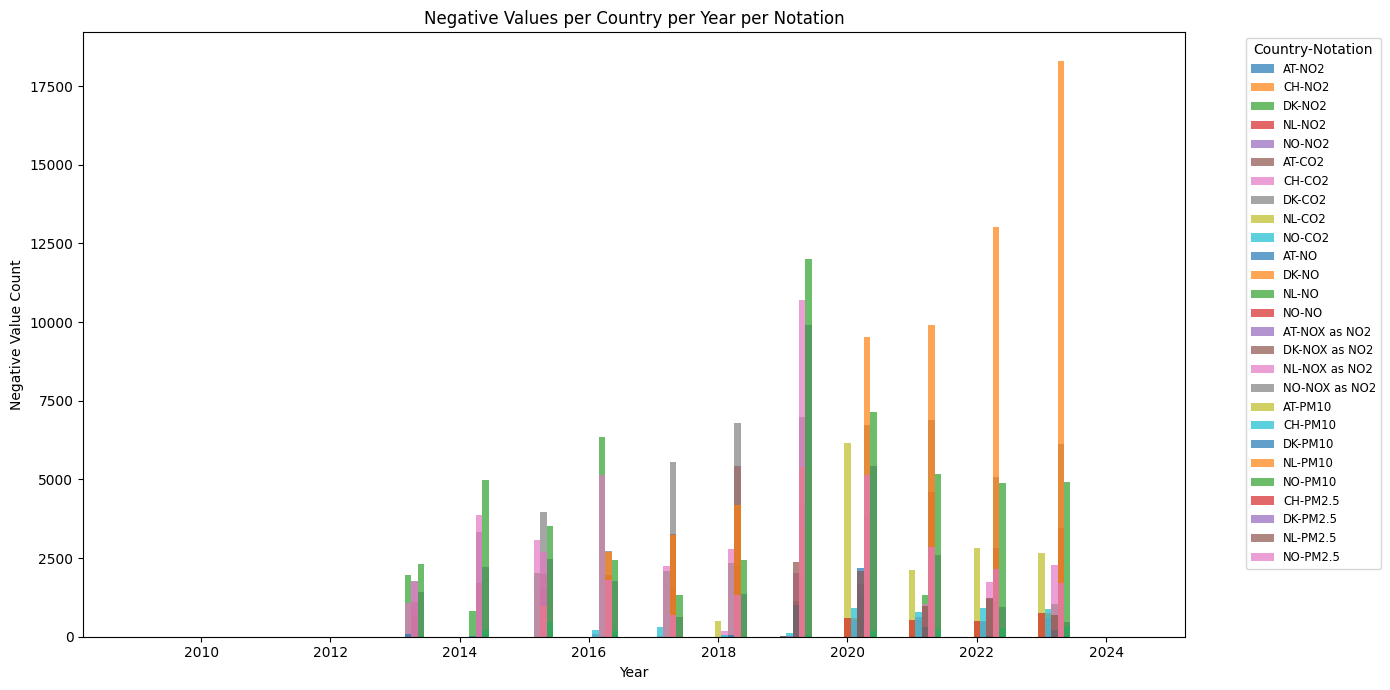

   Country    Notation  negative_proportion  nan_proportion
0       AT         CO2             0.000064             0.0
1       AT          NO             0.000000             0.0
2       AT         NO2             0.000023             0.0
3       AT  NOX as NO2             0.000000             0.0
4       AT        PM10             0.036029             0.0
5       CH         CO2             0.005343             0.0
6       CH         NO2             0.005086             0.0
7       CH        PM10             0.008903             0.0
8       CH       PM2.5             0.004291             0.0
9       DK         CO2             0.000269             0.0
10      DK          NO             0.000000             0.0
11      DK         NO2             0.000321             0.0
12      DK  NOX as NO2             0.000148             0.0
13      DK        PM10             0.024030             0.0
14      DK       PM2.5             0.000155             0.0
15      NL         CO2             0.036

In [7]:
import matplotlib.pyplot as plt

# from the datetime column, extract the year
aq_cleaned['Year'] = aq_cleaned['Datetime'].dt.year

# Calculate negative and NaN counts per Country, Year, Notation
neg_nan_stats = (
    aq_cleaned
    .groupby(['Country', 'Year', 'Notation'])
    .agg(
        total=('Value', 'size'),
        negative=('Value', lambda x: (x < 0).sum()),
        nan=('Value', lambda x: x.isna().sum())
    )
    .reset_index()
)

# Plot negative values per country per year per notation
fig, ax = plt.subplots(figsize=(14, 7))
for notation in neg_nan_stats['Notation'].unique():
    subset = neg_nan_stats[neg_nan_stats['Notation'] == notation]
    for country in subset['Country'].unique():
        country_data = subset[subset['Country'] == country]
        ax.bar(
            country_data['Year'] + (0.1 * list(subset['Country'].unique()).index(country)),
            country_data['negative'],
            width=0.1,
            label=f"{country}-{notation}" if notation == subset['Notation'].unique()[0] else "",
            alpha=0.7
        )
ax.set_xlabel('Year')
ax.set_ylabel('Negative Value Count')
ax.set_title('Negative Values per Country per Year per Notation')
ax.legend(title='Country-Notation', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')
plt.tight_layout()
plt.show()

# Calculate proportion of negative/NaN values per country per notation
prop_stats = (
    aq_cleaned
    .groupby(['Country', 'Notation'])
    .agg(
        total=('Value', 'size'),
        negative=('Value', lambda x: (x < 0).sum()),
        nan=('Value', lambda x: x.isna().sum())
    )
    .reset_index()
)
prop_stats['negative_proportion'] = prop_stats['negative'] / prop_stats['total']
prop_stats['nan_proportion'] = prop_stats['nan'] / prop_stats['total']

print(prop_stats[['Country', 'Notation', 'negative_proportion', 'nan_proportion']])

A non-trivial proportion (2–8%) of negative values in air quality data for pollutants like PM2.5, PM10, NO2, NO, CO2 is a common issue in environmental monitoring datasets. Here are the main reasons:

1. Instrument Noise and Detection Limits
Air quality sensors (especially for low concentrations) have a certain level of measurement noise.
When the true concentration is near zero, random fluctuations and instrument noise can result in negative readings.
This is especially true for automated, continuous analyzers (e.g., chemiluminescence for NOx, beta attenuation for PM).
2. Baseline Correction and Drift
Many instruments perform baseline or zero-point corrections. If the baseline is overestimated, actual readings can dip below zero.
Drift in instrument calibration over time can also cause negative values.
3. Data Processing and Averaging
Negative values can arise when averaging several low or noisy measurements (e.g., hourly or daily means).
Some data processing pipelines do not filter or correct negative values, especially if the negative values are within the instrument's stated uncertainty.
4. Quality Control Flags
Sometimes, negative values are left in the dataset to flag questionable or below-detection-limit data rather than being set to zero or marked as missing.
This allows downstream users to decide how to handle them.
5. Physical Meaning
Negative concentrations are not physically meaningful; they are always an artifact of measurement or processing.

For most analyses, negative values should be set to zero, treated as missing, or otherwise flagged, depending on your scientific question and the recommendations of the data provider.
In our case, the increasing number of negative values across the years would correspond very well with situations in which air quality improves. We therefore choose to set the values to 0.

References:
US EPA Air Sensor Guidebook (see "Negative Values")
EEA Air Quality Data Quality Control

In [11]:
# set Notation column name to 'Pollutant'
aq_cleaned = aq_cleaned.rename(columns={'Notation': 'Pollutant'})
aq_cleaned

,Country,Datetime,Value,Unit,Pollutant,Date,Hour,Year
0,NO,2019-01-01 01:00:00,-9900.0000,ug.m-3,PM10,2019-01-01,1,2019
1,NO,2019-01-01 02:00:00,-9900.0000,ug.m-3,PM10,2019-01-01,2,2019
2,NO,2019-01-01 03:00:00,-9900.0000,ug.m-3,PM10,2019-01-01,3,2019
3,NO,2019-01-01 04:00:00,-9900.0000,ug.m-3,PM10,2019-01-01,4,2019
4,NO,2019-01-01 05:00:00,-9900.0000,ug.m-3,PM10,2019-01-01,5,2019
...,...,...,...,...,...,...,...,...
14767988,NL,2023-12-31 20:00:00,5.4933,ug.m-3,PM2.5,2023-12-31,20,2023
14767989,NL,2023-12-31 21:00:00,4.9933,ug.m-3,PM2.5,2023-12-31,21,2023
14767990,NL,2023-12-31 22:00:00,5.6933,ug.m-3,PM2.5,2023-12-31,22,2023
14767991,NL,2023-12-31 23:00:00,5.3933,ug.m-3,PM2.5,2023-12-31,23,2023


In [30]:
# remove values pre-2012 (entry mistake)
aq_cleaned = aq_cleaned[aq_cleaned['Year'] >= 2012]
# remove values in 2024 (there are almost no values)
aq_cleaned = aq_cleaned[aq_cleaned['Year'] < 2024]
aq_cleaned

,Country,Datetime,Value,Unit,Pollutant,Date,Hour,Year,Weekday,IsWeekend
0,NO,2019-01-01,0.0000,ug.m-3,PM10,2019-01-01,0,2019,1,False
1,NO,2019-01-01,0.0000,ug.m-3,PM10,2019-01-01,0,2019,1,False
2,NO,2019-01-01,0.0000,ug.m-3,PM10,2019-01-01,0,2019,1,False
3,NO,2019-01-01,0.0000,ug.m-3,PM10,2019-01-01,0,2019,1,False
4,NO,2019-01-01,0.0000,ug.m-3,PM10,2019-01-01,0,2019,1,False
...,...,...,...,...,...,...,...,...,...,...
14767802,NL,2023-12-31,5.5467,ug.m-3,PM2.5,2023-12-31,0,2023,6,True
14767803,NL,2023-12-31,5.4933,ug.m-3,PM2.5,2023-12-31,0,2023,6,True
14767804,NL,2023-12-31,4.9933,ug.m-3,PM2.5,2023-12-31,0,2023,6,True
14767805,NL,2023-12-31,5.6933,ug.m-3,PM2.5,2023-12-31,0,2023,6,True


In [33]:
# Count number of entries per year, per pollutant, per country
year_counts = (
    aq_cleaned.groupby(['Country', 'Pollutant', 'Year'])
    .size()
    .reset_index(name='Entry_Count')
)

# Show available years per country and pollutant, with counts
for (country, pollutant), group in year_counts.groupby(['Country', 'Pollutant']):
    years = group[['Year', 'Entry_Count']].sort_values('Year')
    print(f"{country} - {pollutant}:")
    print(years.to_string(index=False))
    print("-" * 40)

AT - CO2:
 Year  Entry_Count
 2013        43795
 2014        43800
 2015        43800
 2016        43920
 2017        36362
 2018        43800
 2019        43800
 2020        35138
 2021        44375
 2022        43800
 2023        43800
 2024            5
----------------------------------------
AT - NO:
 Year  Entry_Count
 2013       105108
 2014       105120
 2015       113879
 2016       114192
 2017       113880
 2018       113880
 2019       112657
 2020       114169
 2021       106297
 2022       113880
 2023       105098
 2024           11
----------------------------------------
AT - NO2:
 Year  Entry_Count
 2013       140121
 2014       140160
 2015       140137
 2016       133128
 2017       131400
 2018       131400
 2019       131400
 2020       131760
 2021       131400
 2022       131400
 2023       127777
 2024           15
----------------------------------------
AT - NOX as NO2:
 Year  Entry_Count
 2013        43795
 2014        52560
 2015        52560
 2016        1

In [15]:
# Set negative (measurement error) values to 0
aq_cleaned.loc[aq_cleaned['Value'] < 0, 'Value'] = 0

# Check if any negative values remain
print("Negative values remaining:", (aq_cleaned['Value'] < 0).sum())

Negative values remaining: 0


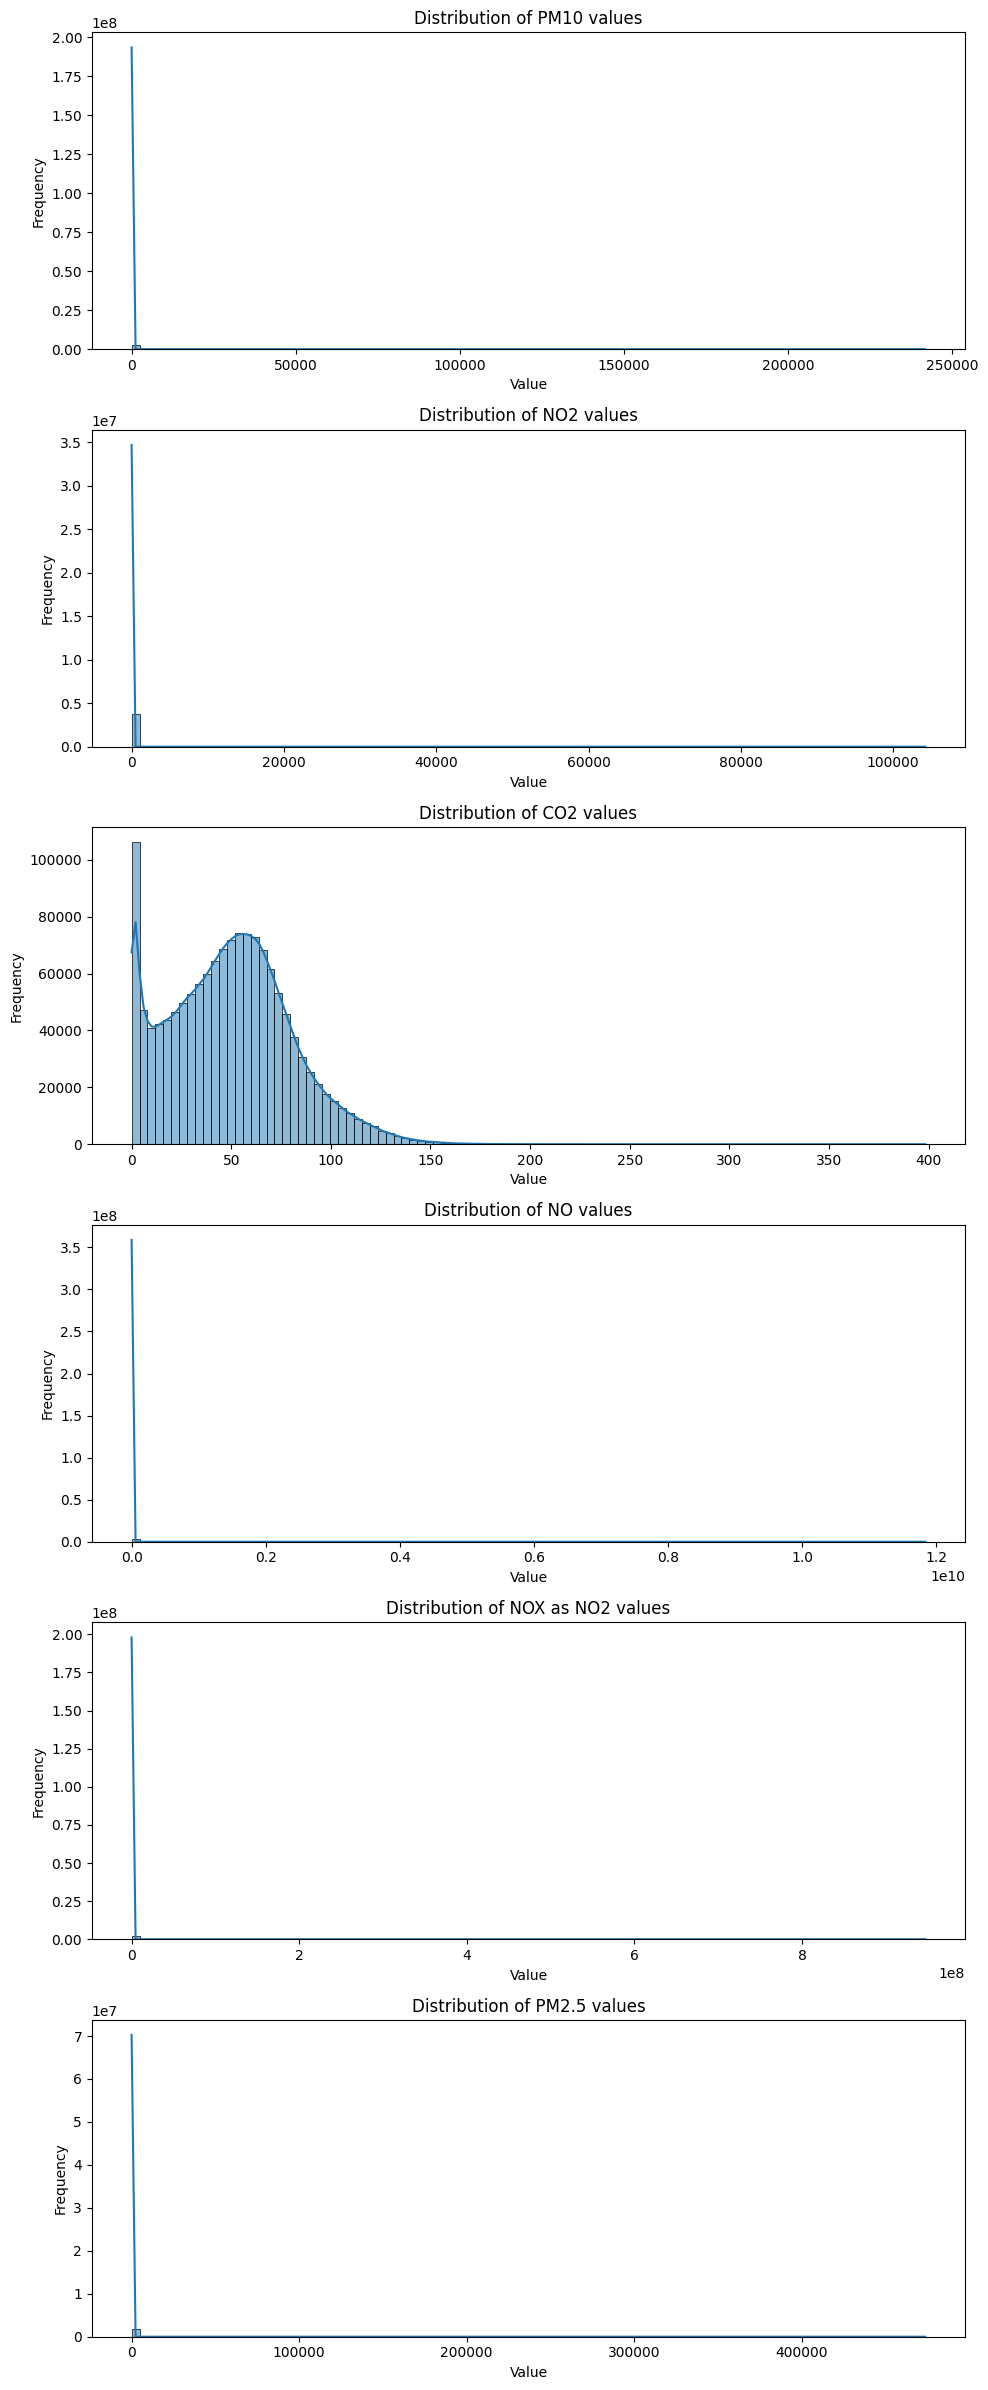

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot distribution for each pollutant to visually inspect outliers
pollutants = aq_cleaned['Pollutant'].unique()
fig, axes = plt.subplots(len(pollutants), 1, figsize=(10, 4 * len(pollutants)), sharex=False)

for i, pollutant in enumerate(pollutants):
    ax = axes[i] if len(pollutants) > 1 else axes
    sns.histplot(
        aq_cleaned[aq_cleaned['Pollutant'] == pollutant]['Value'],
        bins=100, kde=True, ax=ax
    )
    ax.set_title(f'Distribution of {pollutant} values')
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [22]:
import numpy as np

# Function to detect and handle outliers for each pollutant
def handle_outliers(df, value_col='Value', group_col='Pollutant', method='iqr', replace='nan'):
    df_out = df.copy()
    for pollutant in df[group_col].unique():
        mask = df[group_col] == pollutant
        values = df.loc[mask, value_col]
        if method == 'iqr':
            Q1 = values.quantile(0.25)
            Q3 = values.quantile(0.75)
            IQR = Q3 - Q1
            lower = Q1 - 1.5 * IQR
            upper = Q3 + 1.5 * IQR
        elif method == 'zscore':
            mean = values.mean()
            std = values.std()
            lower = mean - 3 * std
            upper = mean + 3 * std
        else:
            raise ValueError("Unknown method")
        outlier_mask = (values < lower) | (values > upper)
        if replace == 'nan':
            df_out.loc[mask & outlier_mask, value_col] = np.nan
        elif replace == 'clip':
            df_out.loc[mask & (values < lower), value_col] = lower
            df_out.loc[mask & (values > upper), value_col] = upper
        elif replace == 'remove':
            df_out = df_out[~(mask & outlier_mask)]
        else:
            raise ValueError("Unknown replace option")
    return df_out

# Example usage: replace outliers with NaN using IQR per pollutant
aq_cleaned_no_outliers = handle_outliers(aq_cleaned, value_col='Value', group_col='Pollutant', method='iqr', replace='nan')

# Show how many outliers were replaced per pollutant
for pollutant in aq_cleaned['Pollutant'].unique():
    n_out = aq_cleaned[aq_cleaned['Pollutant'] == pollutant]['Value'].isna().sum()
    n_out_new = aq_cleaned_no_outliers[aq_cleaned_no_outliers['Pollutant'] == pollutant]['Value'].isna().sum()
    print(f"{pollutant}: {n_out_new - n_out} outliers replaced with NaN")

PM10: 295580 outliers replaced with NaN
NO2: 127674 outliers replaced with NaN
CO2: 9654 outliers replaced with NaN
NO: 139178 outliers replaced with NaN
NOX as NO2: 137042 outliers replaced with NaN
PM2.5: 146172 outliers replaced with NaN


In [27]:
# Calculate total counts per country and pollutant
total_counts = aq_cleaned.groupby(['Country', 'Pollutant'])['Value'].size().reset_index(name='Total_Count')

# Merge with nan_counts_outliers to get NaN counts after outlier removal
nan_stats = nan_counts_outliers.merge(total_counts, on=['Country', 'Pollutant'])

# Calculate proportions
nan_stats['%_Removed'] = 100 * nan_stats['NaN_Outliers'] / nan_stats['Total_Count']
nan_stats['%_Remaining'] = 100 * (1 - nan_stats['NaN_Outliers'] / nan_stats['Total_Count'])

# Display summary
print(nan_stats[['Country', 'Pollutant', 'Total_Count', 'NaN_Outliers', '%_Removed', '%_Remaining']])


   Country   Pollutant  Total_Count  NaN_Outliers  %_Removed  %_Remaining
0       AT         CO2       466395          4571   0.980071    99.019929
1       AT          NO      1218171         57817   4.746214    95.253786
2       AT         NO2      1470099         30947   2.105096    97.894904
3       AT  NOX as NO2       823711         75390   9.152482    90.847518
4       AT        PM10       395737          5782   1.461071    98.538929
5       CH         CO2       471602          3717   0.788165    99.211835
6       CH         NO2       471270          9747   2.068241    97.931759
7       CH        PM10       471290         48764  10.346920    89.653080
8       CH       PM2.5       558113         31445   5.634164    94.365836
9       DK         CO2       122736           122   0.099400    99.900600
10      DK          NO        61367          5900   9.614288    90.385712
11      DK         NO2       184078          3259   1.770445    98.229555
12      DK  NOX as NO2        60708   

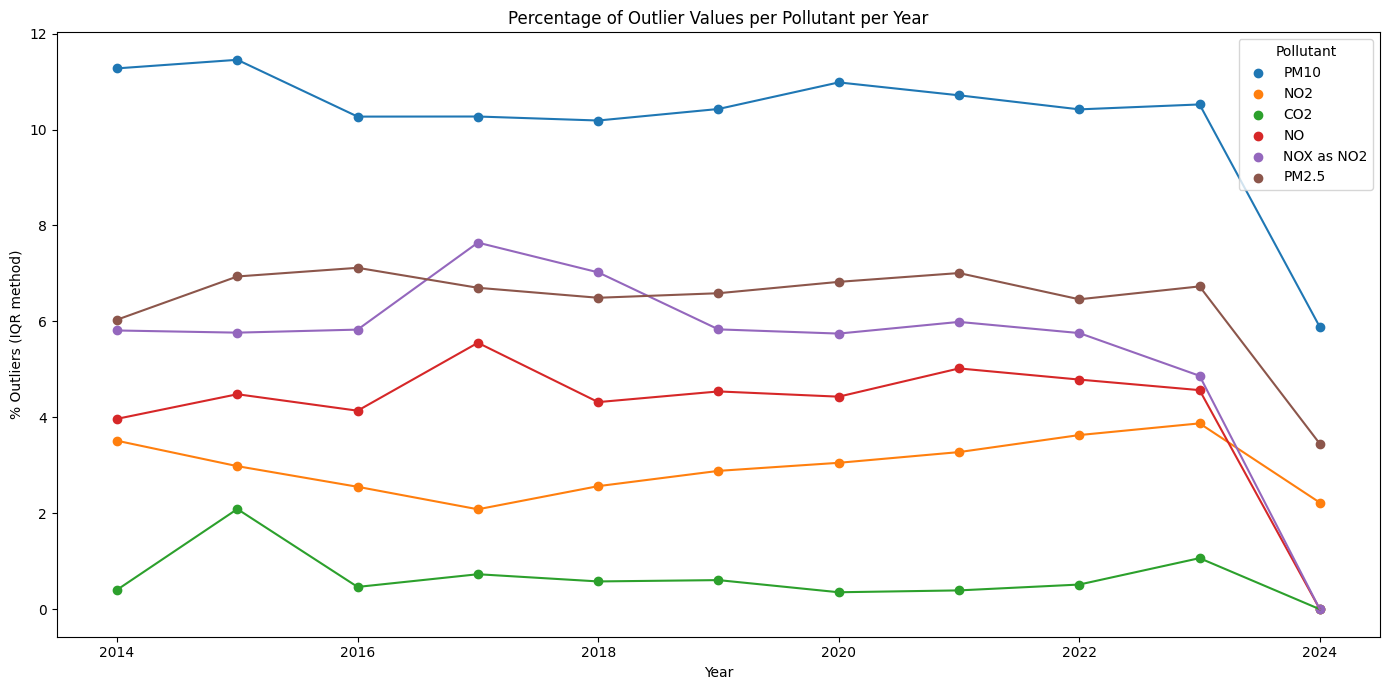

In [31]:
import numpy as np
import matplotlib.pyplot as plt

# Calculate outlier percentage per pollutant per year using IQR method
outlier_stats = []

for pollutant in aq_cleaned['Pollutant'].unique():
    for year in aq_cleaned['Year'].unique():
        mask = (aq_cleaned['Pollutant'] == pollutant) & (aq_cleaned['Year'] == year)
        values = aq_cleaned.loc[mask, 'Value']
        if len(values) == 0:
            continue
        Q1 = values.quantile(0.25)
        Q3 = values.quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        outliers = ((values < lower) | (values > upper)).sum()
        total = len(values)
        outlier_stats.append({
            'Pollutant': pollutant,
            'Year': year,
            'Total': total,
            'Outliers': outliers,
            'Outlier_Percent': 100 * outliers / total if total > 0 else np.nan
        })

outlier_stats_df = pd.DataFrame(outlier_stats)

# Plot: Outlier percentage per pollutant per year (only connect 2014-2024)
plt.figure(figsize=(14, 7))
for pollutant in outlier_stats_df['Pollutant'].unique():
    subset = outlier_stats_df[outlier_stats_df['Pollutant'] == pollutant]
    # Filter for years 2014 to 2024
    mask = (subset['Year'] >= 2014) & (subset['Year'] <= 2024)
    subset_2014_2024 = subset[mask].sort_values('Year')
    # Plot only the points for all years
    plt.scatter(subset_2014_2024['Year'], subset_2014_2024['Outlier_Percent'], label=pollutant)
    # Draw lines only between consecutive years in 2014-2024
    plt.plot(subset_2014_2024['Year'], subset_2014_2024['Outlier_Percent'])

plt.xlabel('Year')
plt.ylabel('% Outliers (IQR method)')
plt.title('Percentage of Outlier Values per Pollutant per Year')
plt.legend(title='Pollutant')
plt.tight_layout()
plt.show()

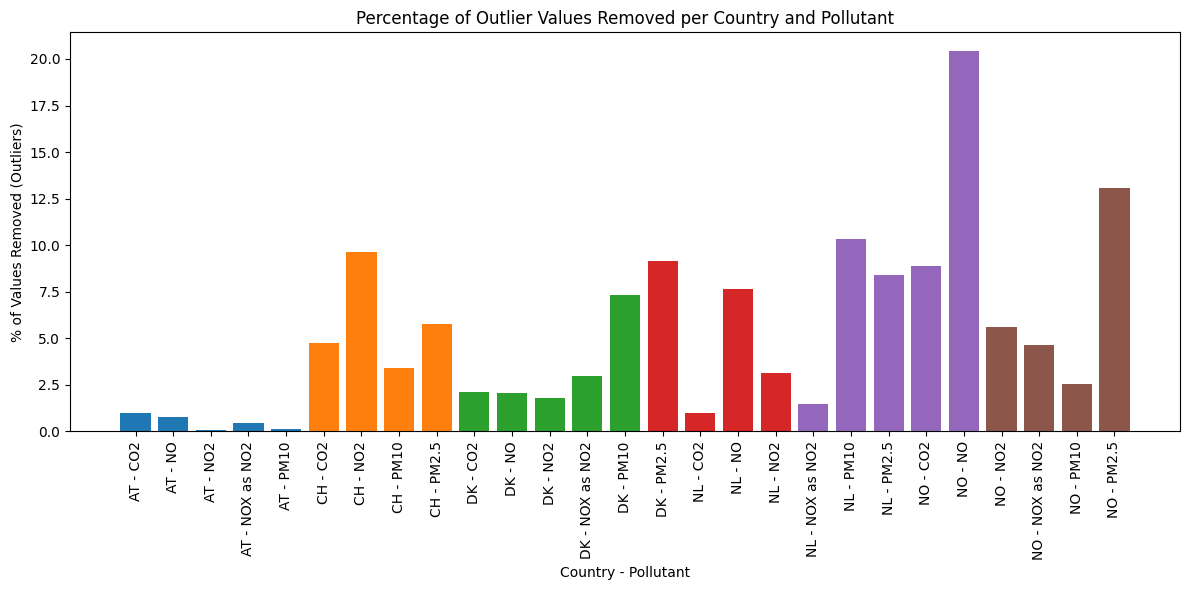

In [ ]:
import matplotlib.pyplot as plt

# Plot %_Removed per pollutant and country
fig, ax = plt.subplots(figsize=(12, 6))
for pollutant in nan_stats['Pollutant'].unique():
    subset = nan_stats[nan_stats['Pollutant'] == pollutant]
    ax.bar(subset['Country'] + " - " + pollutant, subset['%_Removed'], label=pollutant)

ax.set_ylabel('% of Values Removed (Outliers)')
ax.set_xlabel('Country - Pollutant')
ax.set_title('Percentage of Outlier Values Removed per Country and Pollutant')
ax.set_xticks(range(len(nan_stats)))
ax.set_xticklabels(nan_stats['Country'] + " - " + nan_stats['Pollutant'], rotation=90)
plt.tight_layout()
plt.show()

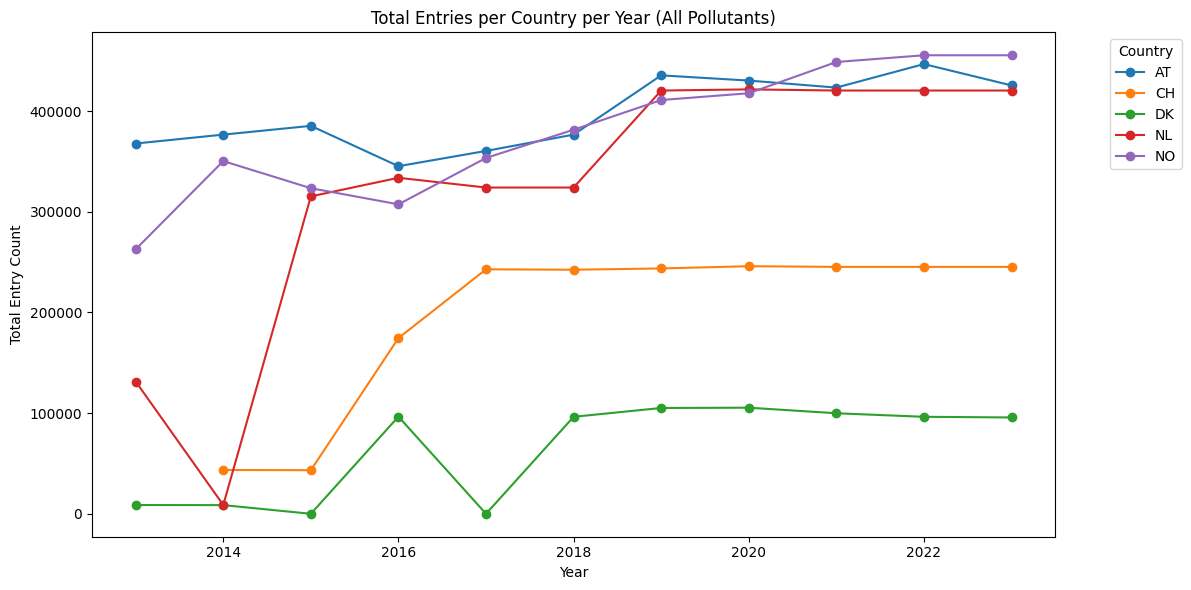

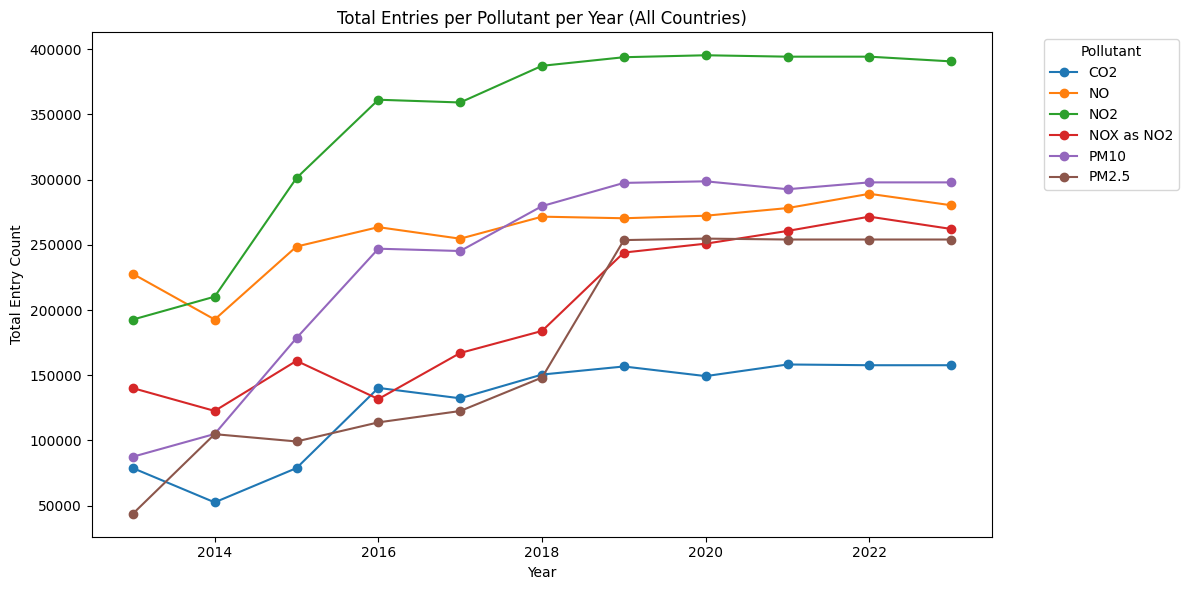

In [37]:
import matplotlib.pyplot as plt

# exclude year 2024 data points and before 2012
aq_cleaned_no_outliers = aq_cleaned_no_outliers[aq_cleaned_no_outliers['Year'] >= 2012]
aq_cleaned_no_outliers = aq_cleaned_no_outliers[aq_cleaned_no_outliers['Year'] != 2024]

# Count number of entries per year, per pollutant, per country
year_counts = (
    aq_cleaned_no_outliers.groupby(['Country', 'Pollutant', 'Year'])
    .size()
    .reset_index(name='Entry_Count')
)

# 1. Total entries per country per year (across all pollutants)
country_year = (
    year_counts.groupby(['Country', 'Year'])['Entry_Count']
    .sum()
    .reset_index()
)

plt.figure(figsize=(12, 6))
for country in country_year['Country'].unique():
    data = country_year[country_year['Country'] == country]
    plt.plot(data['Year'], data['Entry_Count'], marker='o', label=country)
plt.title('Total Entries per Country per Year (All Pollutants)')
plt.xlabel('Year')
plt.ylabel('Total Entry Count')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# 2. Total entries per pollutant per year (across all countries)
pollutant_year = (
    year_counts.groupby(['Pollutant', 'Year'])['Entry_Count']
    .sum()
    .reset_index()
)

plt.figure(figsize=(12, 6))
for pollutant in pollutant_year['Pollutant'].unique():
    data = pollutant_year[pollutant_year['Pollutant'] == pollutant]
    plt.plot(data['Year'], data['Entry_Count'], marker='o', label=pollutant)
plt.title('Total Entries per Pollutant per Year (All Countries)')
plt.xlabel('Year')
plt.ylabel('Total Entry Count')
plt.legend(title='Pollutant', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
aq_cleaned_no_outliers.to_csv("../data/processed/AQ_merged_cleaned.csv", index=False)
print("aq_cleaned_no_outliers exported to ../data/processed/AQ_merged_cleaned.csv")

aq_cleaned_no_outliers exported to ../data/processed/AQ_cleaned.csv


# AQ annual datasets creation

In [1]:
import pandas as pd

aq_cleaned = pd.read_csv("../data/processed/AQ_merged_cleaned.csv")
aq_cleaned.head()

,Country,Datetime,Value,Unit,Pollutant,Date,Hour,Year
0,NO,2019-01-01 01:00:00,0.0,ug.m-3,PM10,2019-01-01,1,2019
1,NO,2019-01-01 02:00:00,0.0,ug.m-3,PM10,2019-01-01,2,2019
2,NO,2019-01-01 03:00:00,0.0,ug.m-3,PM10,2019-01-01,3,2019
3,NO,2019-01-01 04:00:00,0.0,ug.m-3,PM10,2019-01-01,4,2019
4,NO,2019-01-01 05:00:00,0.0,ug.m-3,PM10,2019-01-01,5,2019


In [ ]:
# Daily average per country
daily_avg = aq_cleaned.groupby(['Country', 'Date', 'Pollutant'])['Value'].mean().reset_index()
daily_avg = daily_avg.rename(columns={'Value': 'Daily_Avg'})

# Daytime average (9-18 End time, i.e., 8-17 actual hour)
daytime_mask = aq_cleaned['Hour'].between(9, 18)
daytime_avg = aq_cleaned[daytime_mask].groupby(['Country', 'Date', 'Pollutant'])['Value'].mean().reset_index()
daytime_avg = daytime_avg.rename(columns={'Value': 'Daytime_Avg'})

# Rush-hour average (8-10 and 15-18 End time, i.e., 7-9 and 15-17 actual hour)
rush_mask = (aq_cleaned['Hour'].between(8, 10)) | (aq_cleaned['Hour'].between(15, 18))
rush_avg = aq_cleaned[rush_mask].groupby(['Country', 'Date', 'Pollutant'])['Value'].mean().reset_index()
rush_avg = rush_avg.rename(columns={'Value': 'RushHour_Avg'})

# Merge all averages into one DataFrame
AQ_merged_averages = daily_avg.merge(daytime_avg, on=['Country', 'Date', 'Pollutant'], how='left')
AQ_merged_averages = AQ_merged_averages.merge(rush_avg, on=['Country', 'Date', 'Pollutant'], how='left')

# Save the cleaned dataset
AQ_merged_averages.to_csv("../data/processed/AQ_merged_averages.csv", index=False)

print(AQ_merged_averages.head())

  Country        Date   Pollutant  Daily_Avg  Daytime_Avg  RushHour_Avg
0      AT  2013-01-01         CO2  35.851000          NaN           NaN
1      AT  2013-01-01          NO  43.926209          NaN           NaN
2      AT  2013-01-01         NO2  26.560859          NaN           NaN
3      AT  2013-01-01  NOX as NO2        NaN          NaN           NaN
4      AT  2013-01-01        PM10   1.901100          NaN           NaN


## Averages per year per weekday, weekend and entire week

In [ ]:
import pandas as pd
import numpy as np

# Load the cleaned air quality data
aq_cleaned = pd.read_csv("../data/processed/AQ_merged_cleaned.csv", parse_dates=["Datetime", "Date"])

# Add weekday/weekend columns
aq_cleaned['Weekday'] = aq_cleaned['Datetime'].dt.weekday
aq_cleaned['IsWeekend'] = aq_cleaned['Weekday'] >= 5

# Define masks for daytime and rush-hour (based on 'Hour' column: 1 = 1am, 23 = 11pm)
daytime_mask = aq_cleaned['Hour'].between(9, 18)  # 9:00 to 18:00 inclusive
rush_mask = aq_cleaned['Hour'].between(8, 10) | aq_cleaned['Hour'].between(15, 18)  # 8-10 and 15-18

def annual_avg(df, mask, period):
    # period: 'fullweek', 'weekday', 'weekend'
    if period == 'weekday':
        df = df[~df['IsWeekend']]
    elif period == 'weekend':
        df = df[df['IsWeekend']]
    df = df[mask]
    return (
        df.groupby(['Country', 'Pollutant', 'Year'])['Value']
        .mean()
        .reset_index()
        .rename(columns={'Value': f'AnnualAvg_{period}'})
    )

results = []
for period in ['fullweek', 'weekday', 'weekend']:
    # Daytime
    dt_avg = annual_avg(aq_cleaned, daytime_mask, period)
    dt_avg['Type'] = 'Daytime'
    results.append(dt_avg)
    # Rush-hour
    rh_avg = annual_avg(aq_cleaned, rush_mask, period)
    rh_avg['Type'] = 'RushHour'
    results.append(rh_avg)

# Concatenate and pivot for clarity
annual_averages = pd.concat(results, ignore_index=True)
annual_averages = annual_averages.pivot_table(
    index=['Country', 'Pollutant', 'Year'],
    columns=['Type'],
    values=['AnnualAvg_fullweek', 'AnnualAvg_weekday', 'AnnualAvg_weekend']
).reset_index()

# Flatten columns
annual_averages.columns = ['_'.join([str(i) for i in col if i]) for col in annual_averages.columns.values]

# Save to processed folder
annual_averages.to_csv("../data/processed/AQ_annual_averages.csv", index=False)

annual_averages.head()

C:\Users\jskif\AppData\Local\Temp\ipykernel_18844\4085457184.py:21: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[mask]
C:\Users\jskif\AppData\Local\Temp\ipykernel_18844\4085457184.py:21: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[mask]


In [ ]:
pip install pandas pyarrow
import pandas as pd
import os

input_folder = "/Users/clarabottinelli/Desktop/PQ_downloads"
output_folder = "/Users/clarabottinelli/Desktop/CSV_downloads"

for file in os.listdir(input_folder):
    if file.endswith(".parquet"):
        df = pd.read_parquet(os.path.join(input_folder, file))
        csv_filename = file.replace(".parquet", ".csv")
        df.to_csv(os.path.join(output_folder, csv_filename), index=False)


In [ ]:
samplingpoint_data = {}

for csv_file in os.listdir(output_folder):
    if csv_file.endswith(".csv"):
        file_path = os.path.join(output_folder, csv_file)
        df = pd.read_csv(file_path)
        
        #group dataframe by Samplingpoint
        for samplingpoint, group in df.groupby("Samplingpoint"):
            if samplingpoint not in samplingpoint_data:
                samplingpoint_data[samplingpoint] = group
            else:
                samplingpoint_data[samplingpoint] = pd.concat([samplingpoint_data[samplingpoint], group], ignore_index=True)

#merge dataframe with datapoints for all Samplingpoints
merged_data = pd.concat(samplingpoint_data.values(), ignore_index=True)
merged_data

,Samplingpoint,Pollutant,Start,End,Value,Unit,AggType,Validity,Verification,ResultTime,DataCapture,FkObservationLog
0,NO/SPO_NO0073A_38_1785,38,2019-01-01 00:00:00,2019-01-01 01:00:00,-9900.0000,ug.m-3,hour,-1,1,2020-09-29 11:41:48,NaN,0fc404b0-e3c3-4118-bb62-c80ccfbb99a4
1,NO/SPO_NO0073A_38_1785,38,2019-01-01 01:00:00,2019-01-01 02:00:00,-9900.0000,ug.m-3,hour,-1,1,2020-09-29 11:41:48,NaN,0fc404b0-e3c3-4118-bb62-c80ccfbb99a4
2,NO/SPO_NO0073A_38_1785,38,2019-01-01 02:00:00,2019-01-01 03:00:00,-9900.0000,ug.m-3,hour,-1,1,2020-09-29 11:41:48,NaN,0fc404b0-e3c3-4118-bb62-c80ccfbb99a4
3,NO/SPO_NO0073A_38_1785,38,2019-01-01 03:00:00,2019-01-01 04:00:00,-9900.0000,ug.m-3,hour,-1,1,2020-09-29 11:41:48,NaN,0fc404b0-e3c3-4118-bb62-c80ccfbb99a4
4,NO/SPO_NO0073A_38_1785,38,2019-01-01 04:00:00,2019-01-01 05:00:00,-9900.0000,ug.m-3,hour,-1,1,2020-09-29 11:41:48,NaN,0fc404b0-e3c3-4118-bb62-c80ccfbb99a4
...,...,...,...,...,...,...,...,...,...,...,...,...
14847174,NL/SPO-NL00003_00009_101,9,2023-12-31 19:00:00,2023-12-31 20:00:00,5.4933,ug.m-3,hour,1,1,2024-12-11 14:58:11,NaN,ace1e0cc-9206-461d-a4b3-c9b0085599bd
14847175,NL/SPO-NL00003_00009_101,9,2023-12-31 20:00:00,2023-12-31 21:00:00,4.9933,ug.m-3,hour,1,1,2024-12-11 14:58:11,NaN,ace1e0cc-9206-461d-a4b3-c9b0085599bd
14847176,NL/SPO-NL00003_00009_101,9,2023-12-31 21:00:00,2023-12-31 22:00:00,5.6933,ug.m-3,hour,1,1,2024-12-11 14:58:11,NaN,ace1e0cc-9206-461d-a4b3-c9b0085599bd
14847177,NL/SPO-NL00003_00009_101,9,2023-12-31 22:00:00,2023-12-31 23:00:00,5.3933,ug.m-3,hour,1,1,2024-12-11 14:58:11,NaN,ace1e0cc-9206-461d-a4b3-c9b0085599bd


### Cleaning dataset

In [ ]:
#identify pollutants corresponding to IDs used by EEA
pollutant_codes = {
    5: "NO",
    7: "CO2",
    8: "NO2",
    9: "PM2.5",
    38: "PM10",
    6001: "NOX as NO2"
}

merged_data['Notation'] = merged_data['Pollutant'].map(pollutant_codes)
merged_data

,Samplingpoint,Pollutant,Start,End,Value,Unit,AggType,Validity,Verification,ResultTime,DataCapture,FkObservationLog,Notation
0,NO/SPO_NO0073A_38_1785,38,2019-01-01 00:00:00,2019-01-01 01:00:00,-9900.0000,ug.m-3,hour,-1,1,2020-09-29 11:41:48,NaN,0fc404b0-e3c3-4118-bb62-c80ccfbb99a4,PM10
1,NO/SPO_NO0073A_38_1785,38,2019-01-01 01:00:00,2019-01-01 02:00:00,-9900.0000,ug.m-3,hour,-1,1,2020-09-29 11:41:48,NaN,0fc404b0-e3c3-4118-bb62-c80ccfbb99a4,PM10
2,NO/SPO_NO0073A_38_1785,38,2019-01-01 02:00:00,2019-01-01 03:00:00,-9900.0000,ug.m-3,hour,-1,1,2020-09-29 11:41:48,NaN,0fc404b0-e3c3-4118-bb62-c80ccfbb99a4,PM10
3,NO/SPO_NO0073A_38_1785,38,2019-01-01 03:00:00,2019-01-01 04:00:00,-9900.0000,ug.m-3,hour,-1,1,2020-09-29 11:41:48,NaN,0fc404b0-e3c3-4118-bb62-c80ccfbb99a4,PM10
4,NO/SPO_NO0073A_38_1785,38,2019-01-01 04:00:00,2019-01-01 05:00:00,-9900.0000,ug.m-3,hour,-1,1,2020-09-29 11:41:48,NaN,0fc404b0-e3c3-4118-bb62-c80ccfbb99a4,PM10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14847174,NL/SPO-NL00003_00009_101,9,2023-12-31 19:00:00,2023-12-31 20:00:00,5.4933,ug.m-3,hour,1,1,2024-12-11 14:58:11,NaN,ace1e0cc-9206-461d-a4b3-c9b0085599bd,PM2.5
14847175,NL/SPO-NL00003_00009_101,9,2023-12-31 20:00:00,2023-12-31 21:00:00,4.9933,ug.m-3,hour,1,1,2024-12-11 14:58:11,NaN,ace1e0cc-9206-461d-a4b3-c9b0085599bd,PM2.5
14847176,NL/SPO-NL00003_00009_101,9,2023-12-31 21:00:00,2023-12-31 22:00:00,5.6933,ug.m-3,hour,1,1,2024-12-11 14:58:11,NaN,ace1e0cc-9206-461d-a4b3-c9b0085599bd,PM2.5
14847177,NL/SPO-NL00003_00009_101,9,2023-12-31 22:00:00,2023-12-31 23:00:00,5.3933,ug.m-3,hour,1,1,2024-12-11 14:58:11,NaN,ace1e0cc-9206-461d-a4b3-c9b0085599bd,PM2.5


In [ ]:
print(merged_data['Pollutant'].unique())

[  38    8    7    5 6001    9]


In [ ]:
#convert Start column to datetime and drop rows with NaT values
if not pd.api.types.is_datetime64_any_dtype(merged_data['Start']):
    merged_data['Start'] = pd.to_datetime(merged_data['Start'], errors='coerce', infer_datetime_format=True)

merged_data = merged_data.dropna(subset=['Start'])
merged_data

/var/folders/c8/hcty8r1j2xj189pdz208fpnr0000gn/T/ipykernel_81053/1018579409.py:3: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  merged_data['Start'] = pd.to_datetime(merged_data['Start'], errors='coerce', infer_datetime_format=True)


,Samplingpoint,Pollutant,Start,End,Value,Unit,AggType,Validity,Verification,ResultTime,DataCapture,FkObservationLog,Notation
0,NO/SPO_NO0073A_38_1785,38,2019-01-01 00:00:00,2019-01-01 01:00:00,-9900.0000,ug.m-3,hour,-1,1,2020-09-29 11:41:48,NaN,0fc404b0-e3c3-4118-bb62-c80ccfbb99a4,PM10
1,NO/SPO_NO0073A_38_1785,38,2019-01-01 01:00:00,2019-01-01 02:00:00,-9900.0000,ug.m-3,hour,-1,1,2020-09-29 11:41:48,NaN,0fc404b0-e3c3-4118-bb62-c80ccfbb99a4,PM10
2,NO/SPO_NO0073A_38_1785,38,2019-01-01 02:00:00,2019-01-01 03:00:00,-9900.0000,ug.m-3,hour,-1,1,2020-09-29 11:41:48,NaN,0fc404b0-e3c3-4118-bb62-c80ccfbb99a4,PM10
3,NO/SPO_NO0073A_38_1785,38,2019-01-01 03:00:00,2019-01-01 04:00:00,-9900.0000,ug.m-3,hour,-1,1,2020-09-29 11:41:48,NaN,0fc404b0-e3c3-4118-bb62-c80ccfbb99a4,PM10
4,NO/SPO_NO0073A_38_1785,38,2019-01-01 04:00:00,2019-01-01 05:00:00,-9900.0000,ug.m-3,hour,-1,1,2020-09-29 11:41:48,NaN,0fc404b0-e3c3-4118-bb62-c80ccfbb99a4,PM10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14847174,NL/SPO-NL00003_00009_101,9,2023-12-31 19:00:00,2023-12-31 20:00:00,5.4933,ug.m-3,hour,1,1,2024-12-11 14:58:11,NaN,ace1e0cc-9206-461d-a4b3-c9b0085599bd,PM2.5
14847175,NL/SPO-NL00003_00009_101,9,2023-12-31 20:00:00,2023-12-31 21:00:00,4.9933,ug.m-3,hour,1,1,2024-12-11 14:58:11,NaN,ace1e0cc-9206-461d-a4b3-c9b0085599bd,PM2.5
14847176,NL/SPO-NL00003_00009_101,9,2023-12-31 21:00:00,2023-12-31 22:00:00,5.6933,ug.m-3,hour,1,1,2024-12-11 14:58:11,NaN,ace1e0cc-9206-461d-a4b3-c9b0085599bd,PM2.5
14847177,NL/SPO-NL00003_00009_101,9,2023-12-31 22:00:00,2023-12-31 23:00:00,5.3933,ug.m-3,hour,1,1,2024-12-11 14:58:11,NaN,ace1e0cc-9206-461d-a4b3-c9b0085599bd,PM2.5


In [ ]:
#aggregate sampling points by country
merged_data.insert(0, 'Country', merged_data['Samplingpoint'].str[:2])
merged_data

,Country,Samplingpoint,Pollutant,Start,End,Value,Unit,AggType,Validity,Verification,ResultTime,DataCapture,FkObservationLog,Notation
0,NO,NO/SPO_NO0073A_38_1785,38,2019-01-01 00:00:00,2019-01-01 01:00:00,-9900.0000,ug.m-3,hour,-1,1,2020-09-29 11:41:48,NaN,0fc404b0-e3c3-4118-bb62-c80ccfbb99a4,PM10
1,NO,NO/SPO_NO0073A_38_1785,38,2019-01-01 01:00:00,2019-01-01 02:00:00,-9900.0000,ug.m-3,hour,-1,1,2020-09-29 11:41:48,NaN,0fc404b0-e3c3-4118-bb62-c80ccfbb99a4,PM10
2,NO,NO/SPO_NO0073A_38_1785,38,2019-01-01 02:00:00,2019-01-01 03:00:00,-9900.0000,ug.m-3,hour,-1,1,2020-09-29 11:41:48,NaN,0fc404b0-e3c3-4118-bb62-c80ccfbb99a4,PM10
3,NO,NO/SPO_NO0073A_38_1785,38,2019-01-01 03:00:00,2019-01-01 04:00:00,-9900.0000,ug.m-3,hour,-1,1,2020-09-29 11:41:48,NaN,0fc404b0-e3c3-4118-bb62-c80ccfbb99a4,PM10
4,NO,NO/SPO_NO0073A_38_1785,38,2019-01-01 04:00:00,2019-01-01 05:00:00,-9900.0000,ug.m-3,hour,-1,1,2020-09-29 11:41:48,NaN,0fc404b0-e3c3-4118-bb62-c80ccfbb99a4,PM10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14847174,NL,NL/SPO-NL00003_00009_101,9,2023-12-31 19:00:00,2023-12-31 20:00:00,5.4933,ug.m-3,hour,1,1,2024-12-11 14:58:11,NaN,ace1e0cc-9206-461d-a4b3-c9b0085599bd,PM2.5
14847175,NL,NL/SPO-NL00003_00009_101,9,2023-12-31 20:00:00,2023-12-31 21:00:00,4.9933,ug.m-3,hour,1,1,2024-12-11 14:58:11,NaN,ace1e0cc-9206-461d-a4b3-c9b0085599bd,PM2.5
14847176,NL,NL/SPO-NL00003_00009_101,9,2023-12-31 21:00:00,2023-12-31 22:00:00,5.6933,ug.m-3,hour,1,1,2024-12-11 14:58:11,NaN,ace1e0cc-9206-461d-a4b3-c9b0085599bd,PM2.5
14847177,NL,NL/SPO-NL00003_00009_101,9,2023-12-31 22:00:00,2023-12-31 23:00:00,5.3933,ug.m-3,hour,1,1,2024-12-11 14:58:11,NaN,ace1e0cc-9206-461d-a4b3-c9b0085599bd,PM2.5


In [ ]:
print(merged_data['Country'].value_counts())

Country
AT    4374113
NO    4167809
NL    3541104
CH    1972275
DK     712692
Name: count, dtype: int64


In [ ]:
#drop unnecessary columns
merged_data = merged_data.drop(columns=['ResultTime', 'DataCapture', 'FkObservationLog', 'Validity', 'Verification'])
# rename Notation column to Pollutant and remove pollutant column
merged_data = merged_data.rename(columns={'Notation': 'Pollutant'})
merged_data = merged_data.drop(columns=['Pollutant'])
merged_data

,Country,Samplingpoint,Pollutant,Start,End,Value,Unit,AggType,Notation
0,NO,NO/SPO_NO0073A_38_1785,38,2019-01-01 00:00:00,2019-01-01 01:00:00,-9900.0000,ug.m-3,hour,PM10
1,NO,NO/SPO_NO0073A_38_1785,38,2019-01-01 01:00:00,2019-01-01 02:00:00,-9900.0000,ug.m-3,hour,PM10
2,NO,NO/SPO_NO0073A_38_1785,38,2019-01-01 02:00:00,2019-01-01 03:00:00,-9900.0000,ug.m-3,hour,PM10
3,NO,NO/SPO_NO0073A_38_1785,38,2019-01-01 03:00:00,2019-01-01 04:00:00,-9900.0000,ug.m-3,hour,PM10
4,NO,NO/SPO_NO0073A_38_1785,38,2019-01-01 04:00:00,2019-01-01 05:00:00,-9900.0000,ug.m-3,hour,PM10
...,...,...,...,...,...,...,...,...,...
14847174,NL,NL/SPO-NL00003_00009_101,9,2023-12-31 19:00:00,2023-12-31 20:00:00,5.4933,ug.m-3,hour,PM2.5
14847175,NL,NL/SPO-NL00003_00009_101,9,2023-12-31 20:00:00,2023-12-31 21:00:00,4.9933,ug.m-3,hour,PM2.5
14847176,NL,NL/SPO-NL00003_00009_101,9,2023-12-31 21:00:00,2023-12-31 22:00:00,5.6933,ug.m-3,hour,PM2.5
14847177,NL,NL/SPO-NL00003_00009_101,9,2023-12-31 22:00:00,2023-12-31 23:00:00,5.3933,ug.m-3,hour,PM2.5


In [ ]:
merged_data

,Country,Samplingpoint,Pollutant,Start,End,Value,Unit,AggType,Notation
0,NO,NO/SPO_NO0073A_38_1785,38,2019-01-01 00:00:00,2019-01-01 01:00:00,-9900.0000,ug.m-3,hour,PM10
1,NO,NO/SPO_NO0073A_38_1785,38,2019-01-01 01:00:00,2019-01-01 02:00:00,-9900.0000,ug.m-3,hour,PM10
2,NO,NO/SPO_NO0073A_38_1785,38,2019-01-01 02:00:00,2019-01-01 03:00:00,-9900.0000,ug.m-3,hour,PM10
3,NO,NO/SPO_NO0073A_38_1785,38,2019-01-01 03:00:00,2019-01-01 04:00:00,-9900.0000,ug.m-3,hour,PM10
4,NO,NO/SPO_NO0073A_38_1785,38,2019-01-01 04:00:00,2019-01-01 05:00:00,-9900.0000,ug.m-3,hour,PM10
...,...,...,...,...,...,...,...,...,...
14847174,NL,NL/SPO-NL00003_00009_101,9,2023-12-31 19:00:00,2023-12-31 20:00:00,5.4933,ug.m-3,hour,PM2.5
14847175,NL,NL/SPO-NL00003_00009_101,9,2023-12-31 20:00:00,2023-12-31 21:00:00,4.9933,ug.m-3,hour,PM2.5
14847176,NL,NL/SPO-NL00003_00009_101,9,2023-12-31 21:00:00,2023-12-31 22:00:00,5.6933,ug.m-3,hour,PM2.5
14847177,NL,NL/SPO-NL00003_00009_101,9,2023-12-31 22:00:00,2023-12-31 23:00:00,5.3933,ug.m-3,hour,PM2.5


In [ ]:
output_csv_path = os.path.join(output_folder, "merged_data_export.csv")
merged_data.to_csv(output_csv_path, index=False)
print(f"Exported merged_data to {output_csv_path}")

Exported merged_data to /Users/clarabottinelli/Desktop/CSV_downloads/merged_data_export.csv


In [4]:
import pandas as pd
import numpy as np

# Load the merged air quality data
aq_df = pd.read_csv("../data/processed/AQ_merged_data_export.csv")

# Drop unnecessary columns
aq_cleaned = aq_df.drop(columns=['Samplingpoint', 'Pollutant', 'AggType'], errors='ignore')

# Keep only the 'End' column for datetime
aq_cleaned = aq_cleaned.rename(columns={'End': 'Datetime'})
if 'Start' in aq_cleaned.columns:
    aq_cleaned = aq_cleaned.drop(columns=['Start'])

# Convert 'Datetime' to pandas datetime
aq_cleaned['Datetime'] = pd.to_datetime(aq_cleaned['Datetime'], errors='coerce')
aq_cleaned = aq_cleaned.dropna(subset=['Datetime'])

# Extract date and hour for grouping
aq_cleaned['Date'] = aq_cleaned['Datetime'].dt.date
aq_cleaned['Hour'] = aq_cleaned['Datetime'].dt.hour

In [5]:
# Count NaN values for each Country and Notation
nan_counts = aq_cleaned.groupby(['Country', 'Notation'])['Value'].apply(lambda x: x.isna().sum()).reset_index(name='NaN_Count')

# Count negative values for each Country and Notation
neg_counts = aq_cleaned.groupby(['Country', 'Notation'])['Value'].apply(lambda x: (x < 0).sum()).reset_index(name='Negative_Count')

# Merge the two counts
value_issues = nan_counts.merge(neg_counts, on=['Country', 'Notation'])
print(value_issues)

   Country    Notation  NaN_Count  Negative_Count
0       AT         CO2          0              30
1       AT          NO          0               0
2       AT         NO2          0              34
3       AT  NOX as NO2          0               0
4       AT        PM10          0           14258
5       CH         CO2          0            2520
6       CH         NO2          0            2397
7       CH        PM10          0            4196
8       CH       PM2.5          0            2395
9       DK         CO2          0              33
10      DK          NO          0               0
11      DK         NO2          0              59
12      DK  NOX as NO2          0               9
13      DK        PM10          0            3871
14      DK       PM2.5          0              19
15      NL         CO2          0            9529
16      NL          NO          0           21599
17      NL         NO2          0           13531
18      NL  NOX as NO2          0           23066


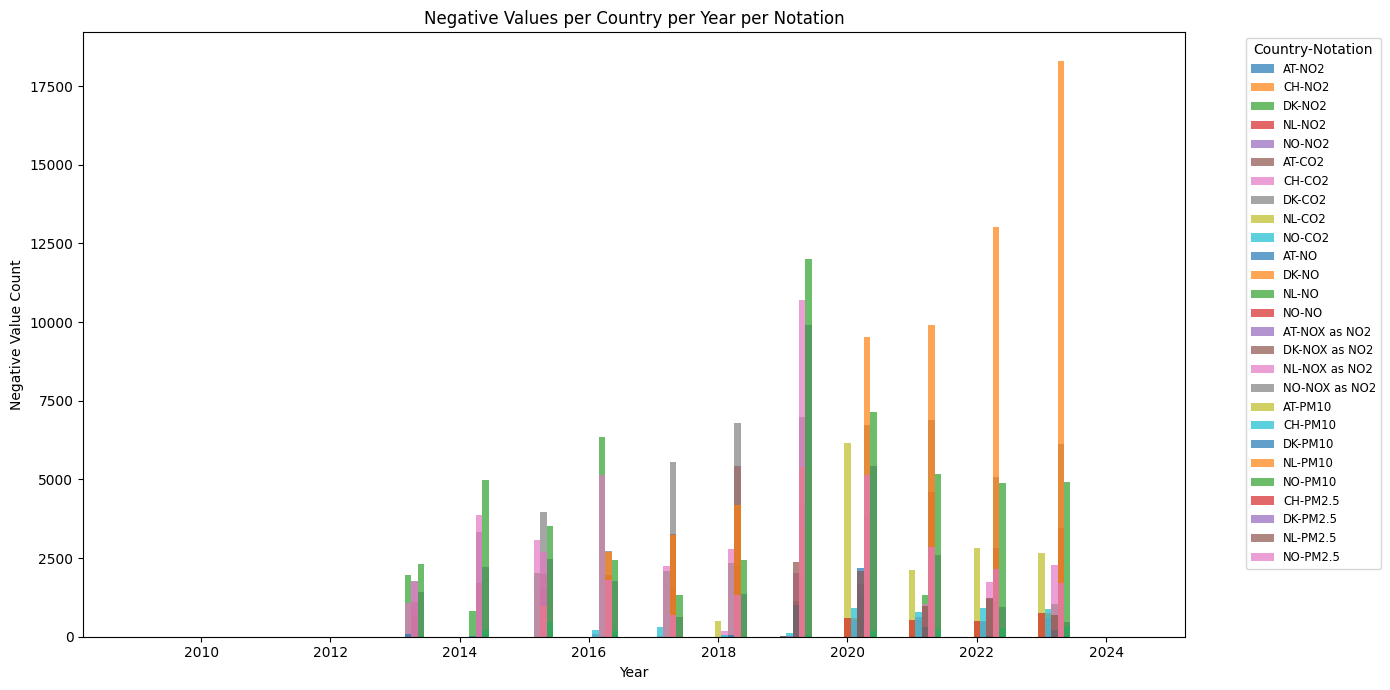

   Country    Notation  negative_proportion  nan_proportion
0       AT         CO2             0.000064             0.0
1       AT          NO             0.000000             0.0
2       AT         NO2             0.000023             0.0
3       AT  NOX as NO2             0.000000             0.0
4       AT        PM10             0.036029             0.0
5       CH         CO2             0.005343             0.0
6       CH         NO2             0.005086             0.0
7       CH        PM10             0.008903             0.0
8       CH       PM2.5             0.004291             0.0
9       DK         CO2             0.000269             0.0
10      DK          NO             0.000000             0.0
11      DK         NO2             0.000321             0.0
12      DK  NOX as NO2             0.000148             0.0
13      DK        PM10             0.024030             0.0
14      DK       PM2.5             0.000155             0.0
15      NL         CO2             0.036

In [7]:
import matplotlib.pyplot as plt

# from the datetime column, extract the year
aq_cleaned['Year'] = aq_cleaned['Datetime'].dt.year

# Calculate negative and NaN counts per Country, Year, Notation
neg_nan_stats = (
    aq_cleaned
    .groupby(['Country', 'Year', 'Notation'])
    .agg(
        total=('Value', 'size'),
        negative=('Value', lambda x: (x < 0).sum()),
        nan=('Value', lambda x: x.isna().sum())
    )
    .reset_index()
)

# Plot negative values per country per year per notation
fig, ax = plt.subplots(figsize=(14, 7))
for notation in neg_nan_stats['Notation'].unique():
    subset = neg_nan_stats[neg_nan_stats['Notation'] == notation]
    for country in subset['Country'].unique():
        country_data = subset[subset['Country'] == country]
        ax.bar(
            country_data['Year'] + (0.1 * list(subset['Country'].unique()).index(country)),
            country_data['negative'],
            width=0.1,
            label=f"{country}-{notation}" if notation == subset['Notation'].unique()[0] else "",
            alpha=0.7
        )
ax.set_xlabel('Year')
ax.set_ylabel('Negative Value Count')
ax.set_title('Negative Values per Country per Year per Notation')
ax.legend(title='Country-Notation', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')
plt.tight_layout()
plt.show()

# Calculate proportion of negative/NaN values per country per notation
prop_stats = (
    aq_cleaned
    .groupby(['Country', 'Notation'])
    .agg(
        total=('Value', 'size'),
        negative=('Value', lambda x: (x < 0).sum()),
        nan=('Value', lambda x: x.isna().sum())
    )
    .reset_index()
)
prop_stats['negative_proportion'] = prop_stats['negative'] / prop_stats['total']
prop_stats['nan_proportion'] = prop_stats['nan'] / prop_stats['total']

print(prop_stats[['Country', 'Notation', 'negative_proportion', 'nan_proportion']])

A non-trivial proportion (2–8%) of negative values in air quality data for pollutants like PM2.5, PM10, NO2, NO, CO2 is a common issue in environmental monitoring datasets. Here are the main reasons:

1. Instrument Noise and Detection Limits
Air quality sensors (especially for low concentrations) have a certain level of measurement noise.
When the true concentration is near zero, random fluctuations and instrument noise can result in negative readings.
This is especially true for automated, continuous analyzers (e.g., chemiluminescence for NOx, beta attenuation for PM).
2. Baseline Correction and Drift
Many instruments perform baseline or zero-point corrections. If the baseline is overestimated, actual readings can dip below zero.
Drift in instrument calibration over time can also cause negative values.
3. Data Processing and Averaging
Negative values can arise when averaging several low or noisy measurements (e.g., hourly or daily means).
Some data processing pipelines do not filter or correct negative values, especially if the negative values are within the instrument's stated uncertainty.
4. Quality Control Flags
Sometimes, negative values are left in the dataset to flag questionable or below-detection-limit data rather than being set to zero or marked as missing.
This allows downstream users to decide how to handle them.
5. Physical Meaning
Negative concentrations are not physically meaningful; they are always an artifact of measurement or processing.

For most analyses, negative values should be set to zero, treated as missing, or otherwise flagged, depending on your scientific question and the recommendations of the data provider.
In our case, the increasing number of negative values across the years would correspond very well with situations in which air quality improves. We therefore choose to set the values to 0.

References:
US EPA Air Sensor Guidebook (see "Negative Values")
EEA Air Quality Data Quality Control

In [11]:
# set Notation column name to 'Pollutant'
aq_cleaned = aq_cleaned.rename(columns={'Notation': 'Pollutant'})
aq_cleaned

,Country,Datetime,Value,Unit,Pollutant,Date,Hour,Year
0,NO,2019-01-01 01:00:00,-9900.0000,ug.m-3,PM10,2019-01-01,1,2019
1,NO,2019-01-01 02:00:00,-9900.0000,ug.m-3,PM10,2019-01-01,2,2019
2,NO,2019-01-01 03:00:00,-9900.0000,ug.m-3,PM10,2019-01-01,3,2019
3,NO,2019-01-01 04:00:00,-9900.0000,ug.m-3,PM10,2019-01-01,4,2019
4,NO,2019-01-01 05:00:00,-9900.0000,ug.m-3,PM10,2019-01-01,5,2019
...,...,...,...,...,...,...,...,...
14767988,NL,2023-12-31 20:00:00,5.4933,ug.m-3,PM2.5,2023-12-31,20,2023
14767989,NL,2023-12-31 21:00:00,4.9933,ug.m-3,PM2.5,2023-12-31,21,2023
14767990,NL,2023-12-31 22:00:00,5.6933,ug.m-3,PM2.5,2023-12-31,22,2023
14767991,NL,2023-12-31 23:00:00,5.3933,ug.m-3,PM2.5,2023-12-31,23,2023


In [15]:
# Set negative (measurement error) values to 0
aq_cleaned.loc[aq_cleaned['Value'] < 0, 'Value'] = 0

# Check if any negative values remain
print("Negative values remaining:", (aq_cleaned['Value'] < 0).sum())

Negative values remaining: 0


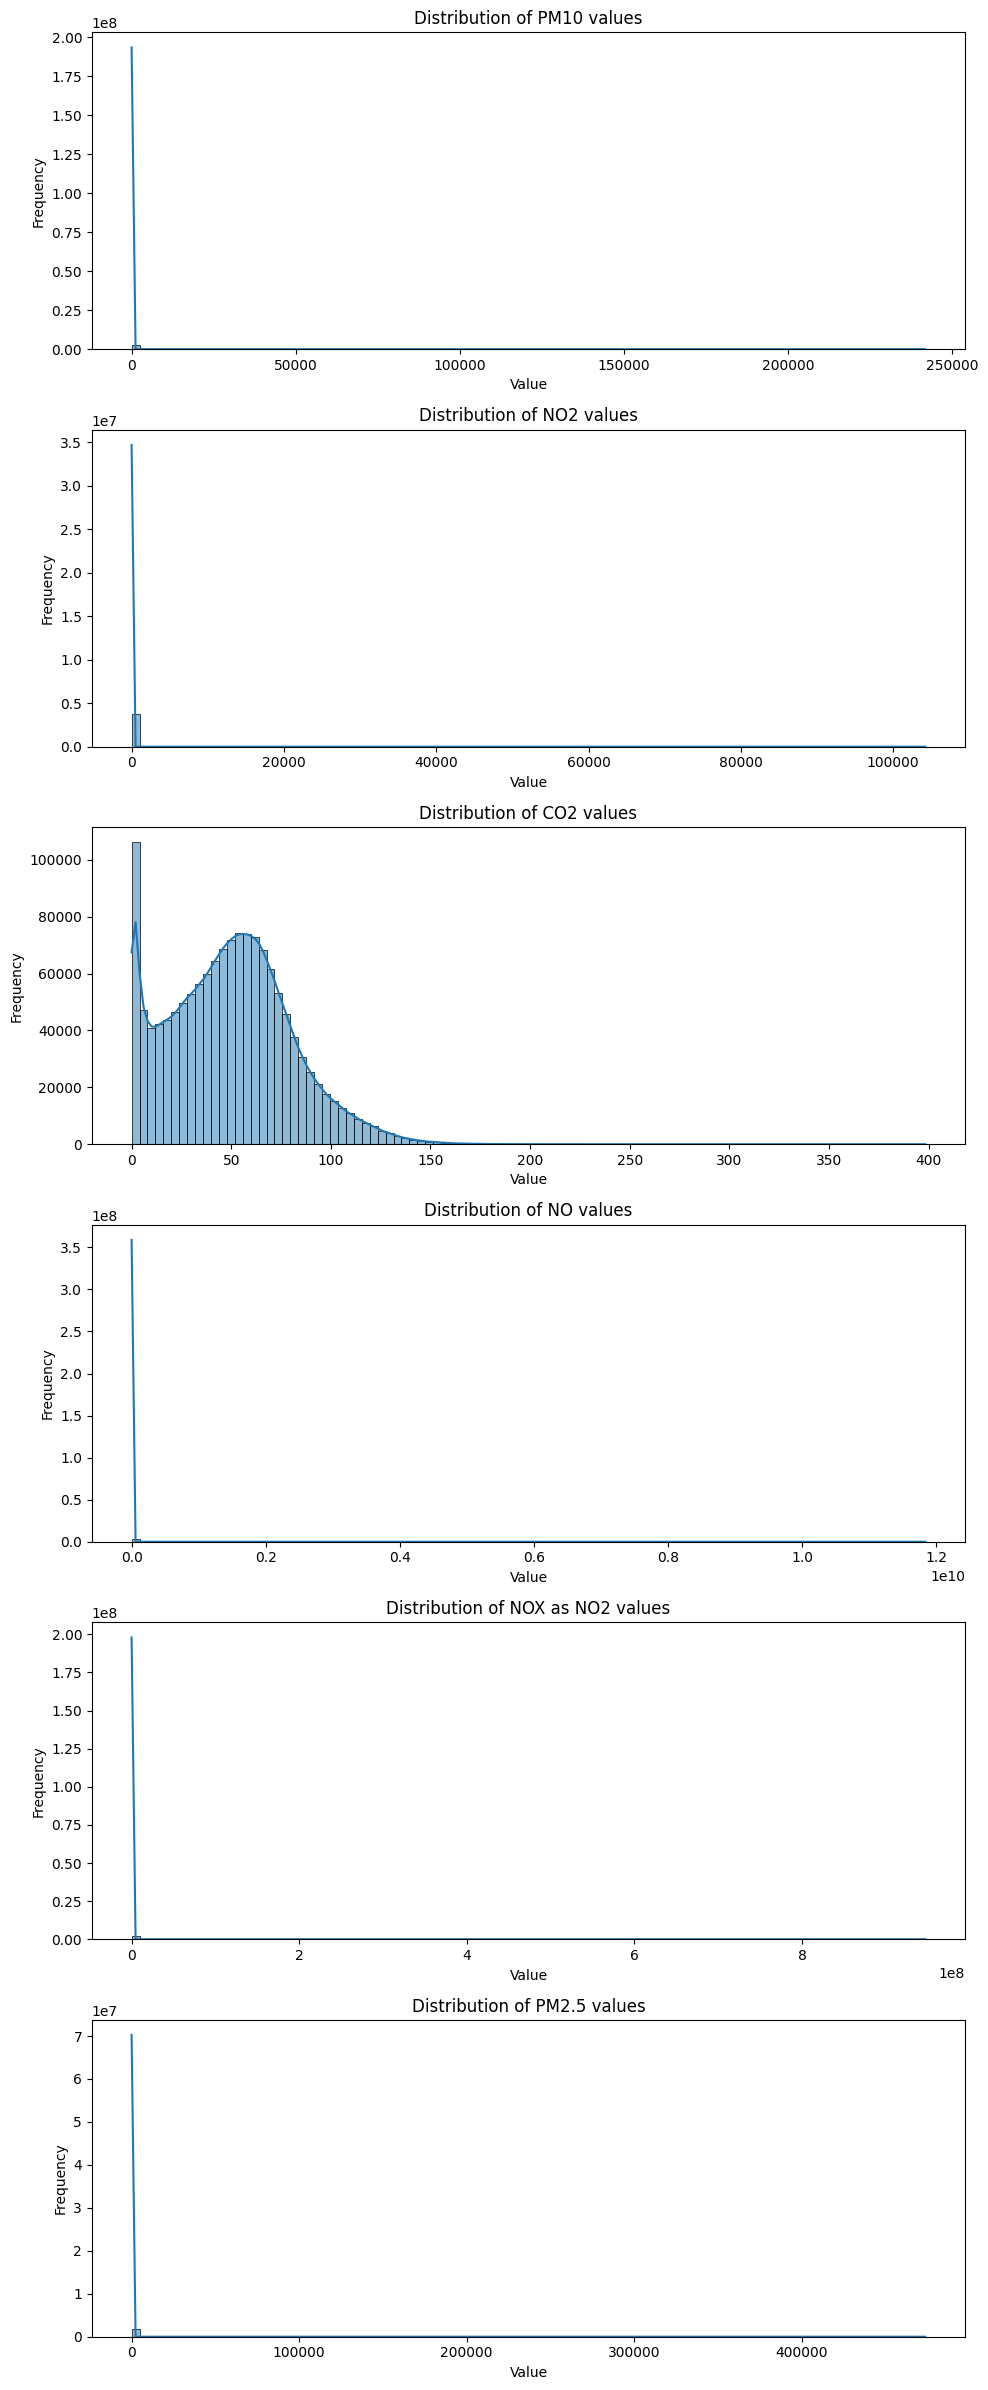

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot distribution for each pollutant to visually inspect outliers
pollutants = aq_cleaned['Pollutant'].unique()
fig, axes = plt.subplots(len(pollutants), 1, figsize=(10, 4 * len(pollutants)), sharex=False)

for i, pollutant in enumerate(pollutants):
    ax = axes[i] if len(pollutants) > 1 else axes
    sns.histplot(
        aq_cleaned[aq_cleaned['Pollutant'] == pollutant]['Value'],
        bins=100, kde=True, ax=ax
    )
    ax.set_title(f'Distribution of {pollutant} values')
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [20]:
aq_cleaned.to_csv("../data/processed/AQ_cleaned.csv", index=False)
print("aq_cleaned exported to ../data/processed/AQ_cleaned.csv")

KeyboardInterrupt: 

In [17]:
# Daily average per country
daily_avg = aq_cleaned.groupby(['Country', 'Date', 'Pollutant'])['Value'].mean().reset_index()
daily_avg = daily_avg.rename(columns={'Value': 'Daily_Avg'})

# Daytime average (9-18 End time, i.e., 8-17 actual hour)
daytime_mask = aq_cleaned['Hour'].between(9, 18)
daytime_avg = aq_cleaned[daytime_mask].groupby(['Country', 'Date', 'Pollutant'])['Value'].mean().reset_index()
daytime_avg = daytime_avg.rename(columns={'Value': 'Daytime_Avg'})

# Rush-hour average (8-10 and 15-18 End time, i.e., 7-9 and 15-17 actual hour)
rush_mask = (aq_cleaned['Hour'].between(8, 10)) | (aq_cleaned['Hour'].between(15, 18))
rush_avg = aq_cleaned[rush_mask].groupby(['Country', 'Date', 'Pollutant'])['Value'].mean().reset_index()
rush_avg = rush_avg.rename(columns={'Value': 'RushHour_Avg'})

# Merge all averages into one DataFrame
aq_merged_cleaned = daily_avg.merge(daytime_avg, on=['Country', 'Date', 'Pollutant'], how='left')
aq_merged_cleaned = aq_merged_cleaned.merge(rush_avg, on=['Country', 'Date', 'Pollutant'], how='left')

# Save the cleaned dataset
aq_merged_cleaned.to_csv("../data/processed/AQ_merged_cleaned.csv", index=False)

print(aq_merged_cleaned.head())

  Country        Date   Pollutant  Daily_Avg  Daytime_Avg  RushHour_Avg
0      AT  2009-01-01         NO2  35.525558          NaN           NaN
1      AT  2013-01-01         CO2  35.851000    38.626760     37.535657
2      AT  2013-01-01          NO  80.641822    52.104975     51.446887
3      AT  2013-01-01         NO2  26.560859    22.000584     24.580176
4      AT  2013-01-01  NOX as NO2  53.923347    45.303470     44.564314


## Annual averages (weekdays, rush-hours, weekend)

In [ ]:
import pandas as pd
import numpy as np

# Load the merged air quality data
aq_df = pd.read_csv("../data/processed/AQ_cleaned.csv")

# Prepare datetime and helper columns
aq_df['Datetime'] = pd.to_datetime(aq_df['End'], errors='coerce')
aq_df = aq_df.dropna(subset=['Datetime'])
aq_df['Year'] = aq_df['Datetime'].dt.year
aq_df['Hour'] = aq_df['Datetime'].dt.hour
aq_df['Weekday'] = aq_df['Datetime'].dt.weekday  # 0=Monday, ..., 6=Sunday
aq_df['IsWeekend'] = aq_df['Weekday'] >= 5

# Helper masks
daytime_mask = aq_df['Hour'].between(9, 18)  # End time 9-18 (i.e., 8-17 actual hour)
rush_mask = (aq_df['Hour'].between(8, 10)) | (aq_df['Hour'].between(16, 18))  # End time 8-10, 15-18

def annual_avg(df, mask, period):
    # period: 'fullweek', 'weekday', 'weekend'
    if period == 'weekday':
        df = df[~df['IsWeekend']]
    elif period == 'weekend':
        df = df[df['IsWeekend']]
    df = df[mask]
    return (
        df.groupby(['Country', 'Pollutant', 'Year'])['Value']
        .mean()
        .reset_index()
        .rename(columns={'Value': f'AnnualAvg_{period}'})
    )

# Compute all combinations
results = []

for period in ['fullweek', 'weekday', 'weekend']:
    # Daytime
    dt_avg = annual_avg(aq_df, daytime_mask, period)
    dt_avg['Type'] = 'Daytime'
    results.append(dt_avg)
    # Rush-hour
    rh_avg = annual_avg(aq_df, rush_mask, period)
    rh_avg['Type'] = 'RushHour'
    results.append(rh_avg)

# Concatenate and pivot for clarity
annual_averages = pd.concat(results, ignore_index=True)
annual_averages = annual_averages.pivot_table(
    index=['Country', 'Pollutant', 'Year'],
    columns=['Type'],
    values=['AnnualAvg_fullweek', 'AnnualAvg_weekday', 'AnnualAvg_weekend']
).reset_index()

# Flatten columns
annual_averages.columns = ['_'.join([str(i) for i in col if i]) for col in annual_averages.columns.values]

# rename Pollutant column to 'Pollutant'
annual_averages = annual_averages.rename(columns={'Pollutant': 'Pollutant'})

# Save to processed folder
annual_averages.to_csv("../data/processed/AQ_annual_averages.csv", index=False)

print(annual_averages.head())

KeyboardInterrupt: 

### 24h average

In [ ]:
# Create a copy of merged_data
merged_data_copy = merged_data.copy()

# Compute daily average of Value for each Pollutant per Country
daily_avg_per_country = (
    merged_data_copy.groupby(['Country', 'Pollutant', 'Start'])['Value']
    .mean()
    .reset_index()
    .rename(columns={'Value': 'DailyAverageValue'})
)

daily_avg_per_country

,Country,Pollutant,Start,DailyAverageValue
0,AT,5,2013-01-01 00:00:00,319.393036
1,AT,5,2013-01-01 01:00:00,297.272252
2,AT,5,2013-01-01 02:00:00,158.900503
3,AT,5,2013-01-01 03:00:00,86.559707
4,AT,5,2013-01-01 04:00:00,59.949791
...,...,...,...,...
2209673,NO,6001,2023-12-31 19:00:00,3.906768
2209674,NO,6001,2023-12-31 20:00:00,4.139576
2209675,NO,6001,2023-12-31 21:00:00,3.564156
2209676,NO,6001,2023-12-31 22:00:00,2.909819


In [ ]:
#summary statistics of daily average values
daily_avg_per_country.describe()

,Pollutant,Start,DailyAverageValue
count,2.209678e+06,2209678,2.209678e+06
mean,9.384940e+02,2019-02-05 11:19:44.730623488,-1.413213e+03
min,5.000000e+00,2008-12-31 23:00:00,-1.167965e+09
25%,7.000000e+00,2016-08-27 19:15:00,6.201582e+00
50%,8.000000e+00,2019-04-30 23:00:00,1.658283e+01
75%,3.800000e+01,2021-08-30 11:00:00,3.630217e+01
max,6.001000e+03,2023-12-31 23:00:00,1.183894e+09
std,2.163275e+03,NaN,1.573824e+06


In [ ]:
# don't think we need to get rid of outliers necessarily
#getting rid of outliers
Q1 = daily_avg_per_country['DailyAverageValue'].quantile(0.25)
Q3 = daily_avg_per_country['DailyAverageValue'].quantile(0.75)

IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

daily_avg_per_country = daily_avg_per_country[
    (daily_avg_per_country['DailyAverageValue'] >= lower_bound) &
    (daily_avg_per_country['DailyAverageValue'] <= upper_bound)
]

daily_avg_per_country

,Country,Pollutant,Start,DailyAverageValue
4,AT,5,2013-01-01 04:00:00,59.949791
5,AT,5,2013-01-01 05:00:00,52.924208
6,AT,5,2013-01-01 06:00:00,49.834083
7,AT,5,2013-01-01 07:00:00,49.908625
8,AT,5,2013-01-01 08:00:00,51.497500
...,...,...,...,...
2209673,NO,6001,2023-12-31 19:00:00,3.906768
2209674,NO,6001,2023-12-31 20:00:00,4.139576
2209675,NO,6001,2023-12-31 21:00:00,3.564156
2209676,NO,6001,2023-12-31 22:00:00,2.909819


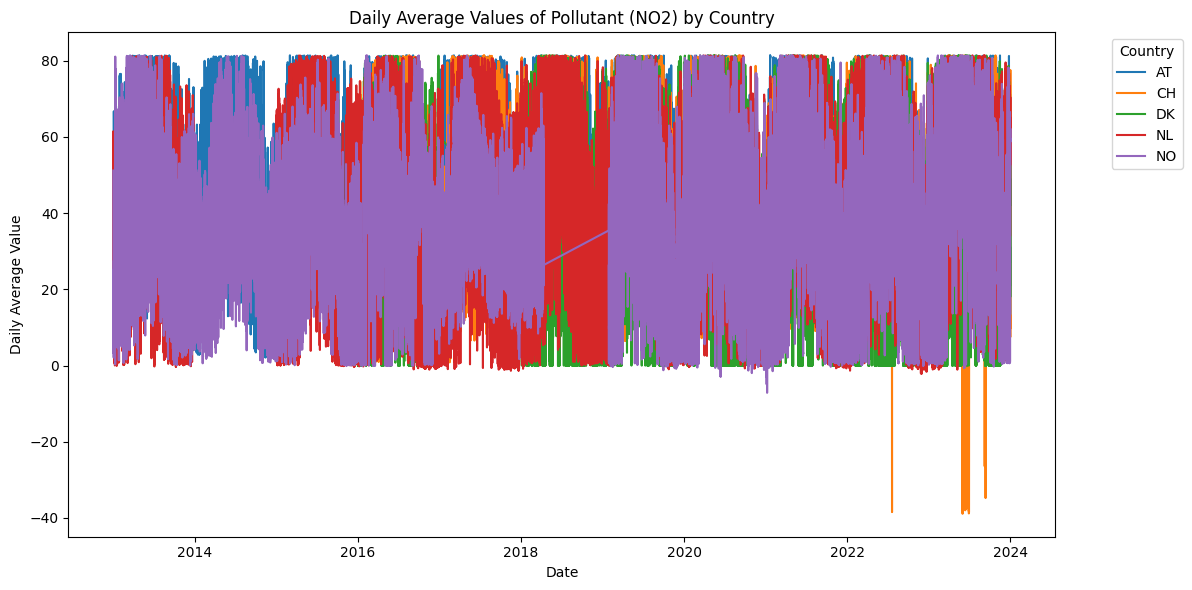

In [ ]:
import matplotlib.pyplot as plt

# Filter data for a specific pollutant (e.g., NO2) for better visualization
pollutant_to_visualize = 7 # NO2
filtered_data = daily_avg_per_country[daily_avg_per_country['Pollutant'] == pollutant_to_visualize]

# Plot the data
plt.figure(figsize=(12, 6))
for country in filtered_data['Country'].unique():
    country_data = filtered_data[filtered_data['Country'] == country]
    plt.plot(country_data['Start'], country_data['DailyAverageValue'], label=country)

plt.title('Daily Average Values of Pollutant (NO2) by Country')
plt.xlabel('Date')
plt.ylabel('Daily Average Value')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### Day-time avg

In [ ]:
# Filter data for day-time values (08:00:00 to 20:00:00)
day_time_data = merged_data[
    (merged_data['Start'].dt.time >= pd.to_datetime('08:00:00').time()) &
    (merged_data['Start'].dt.time <= pd.to_datetime('20:00:00').time())
]

# Compute daily mean for each pollutant value for each country
daily_daytime_avg_per_country = (
    day_time_data.groupby(['Country', 'Pollutant', day_time_data['Start'].dt.date])['Value']
    .mean()
    .reset_index()
    .rename(columns={'Start': 'Date', 'Value': 'DailyDaytimeAverageValue'})
)

daily_daytime_avg_per_country

,Country,Pollutant,Date,DailyDaytimeAverageValue
0,AT,5,2013-01-01,52.110413
1,AT,5,2013-01-02,25.221235
2,AT,5,2013-01-03,9.707832
3,AT,5,2013-01-04,9.635445
4,AT,5,2013-01-05,3.943111
...,...,...,...,...
92072,NO,6001,2023-12-27,-39.505708
92073,NO,6001,2023-12-28,7.945569
92074,NO,6001,2023-12-29,6.633458
92075,NO,6001,2023-12-30,10.783207


In [ ]:
#summary statistics
summary_stats = daily_daytime_avg_per_country['DailyDaytimeAverageValue'].describe()
print(summary_stats)

#remove outliers
Q1 = daily_daytime_avg_per_country['DailyDaytimeAverageValue'].quantile(0.25)
Q3 = daily_daytime_avg_per_country['DailyDaytimeAverageValue'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

daily_daytime_avg_per_country = daily_daytime_avg_per_country[
    (daily_daytime_avg_per_country['DailyDaytimeAverageValue'] >= lower_bound) &
    (daily_daytime_avg_per_country['DailyDaytimeAverageValue'] <= upper_bound)
]

daily_daytime_avg_per_country

count    9.207700e+04
mean    -1.309438e+03
std      4.640776e+05
min     -1.399059e+08
25%      6.921385e+00
50%      1.860801e+01
75%      4.005826e+01
max      1.245011e+07
Name: DailyDaytimeAverageValue, dtype: float64


,Country,Pollutant,Date,DailyDaytimeAverageValue
0,AT,5,2013-01-01,52.110413
1,AT,5,2013-01-02,25.221235
2,AT,5,2013-01-03,9.707832
3,AT,5,2013-01-04,9.635445
4,AT,5,2013-01-05,3.943111
...,...,...,...,...
92072,NO,6001,2023-12-27,-39.505708
92073,NO,6001,2023-12-28,7.945569
92074,NO,6001,2023-12-29,6.633458
92075,NO,6001,2023-12-30,10.783207


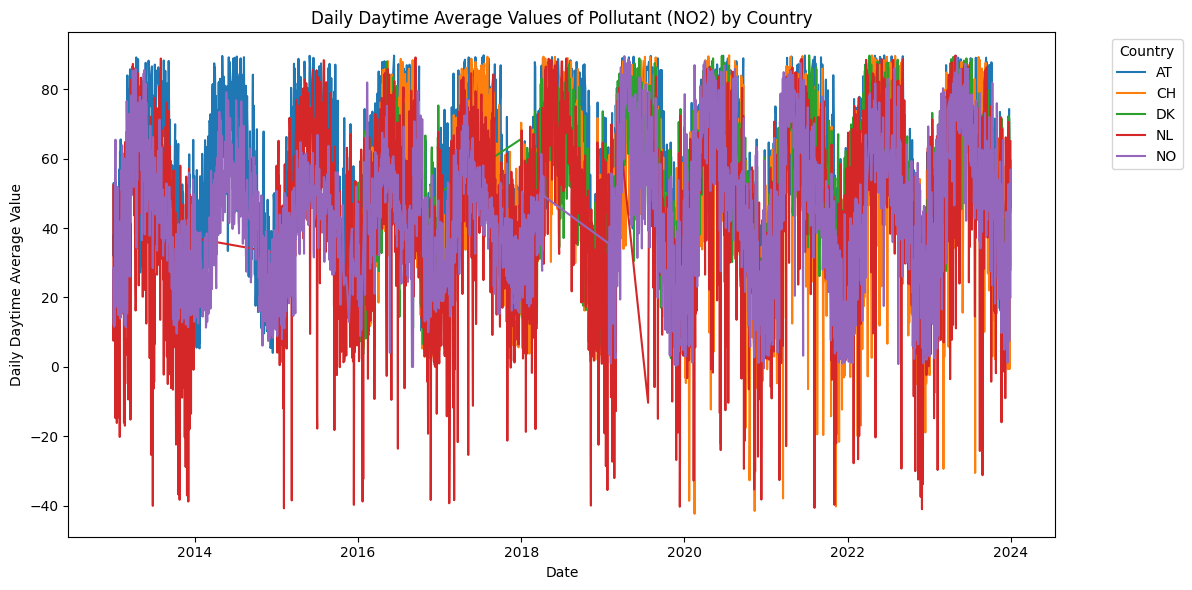

In [ ]:
import matplotlib.pyplot as plt

# Filter data for a specific pollutant (e.g., NO2) for better visualization
pollutant_to_visualize = 7  # NO2
filtered_data = daily_daytime_avg_per_country[daily_daytime_avg_per_country['Pollutant'] == pollutant_to_visualize]

# Plot the data
plt.figure(figsize=(12, 6))
for country in filtered_data['Country'].unique():
    country_data = filtered_data[filtered_data['Country'] == country]
    plt.plot(country_data['Date'], country_data['DailyDaytimeAverageValue'], label=country)

plt.title('Daily Daytime Average Values of Pollutant (NO2) by Country')
plt.xlabel('Date')
plt.ylabel('Daily Daytime Average Value')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### Peak-traffic hour windows

In [ ]:
# Filter data for the specified time ranges
peak_traffic_data = merged_data[
    ((merged_data['Start'].dt.time >= pd.to_datetime('06:00:00').time()) & 
     (merged_data['Start'].dt.time <= pd.to_datetime('10:00:00').time())) |
    ((merged_data['Start'].dt.time >= pd.to_datetime('16:00:00').time()) & 
     (merged_data['Start'].dt.time <= pd.to_datetime('20:00:00').time()))
]

# Compute daily mean for each pollutant value for each country
daily_peak_traffic_avg_per_country = (
    peak_traffic_data.groupby(['Country', 'Pollutant', peak_traffic_data['Start'].dt.date])['Value']
    .mean()
    .reset_index()
    .rename(columns={'Start': 'Date', 'Value': 'DailyPeakTrafficAverageValue'})
)

daily_peak_traffic_avg_per_country

,Country,Pollutant,Date,DailyPeakTrafficAverageValue
0,AT,5,2013-01-01,51.586312
1,AT,5,2013-01-02,31.677111
2,AT,5,2013-01-03,12.501949
3,AT,5,2013-01-04,8.393159
4,AT,5,2013-01-05,3.950906
...,...,...,...,...
92073,NO,6001,2023-12-27,22.545110
92074,NO,6001,2023-12-28,9.120578
92075,NO,6001,2023-12-29,7.111636
92076,NO,6001,2023-12-30,9.878856


In [ ]:
# Generate summary statistics
summary_stats = daily_peak_traffic_avg_per_country['DailyPeakTrafficAverageValue'].describe()
print(summary_stats)

# Remove outliers using the IQR method
Q1 = daily_peak_traffic_avg_per_country['DailyPeakTrafficAverageValue'].quantile(0.25)
Q3 = daily_peak_traffic_avg_per_country['DailyPeakTrafficAverageValue'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

daily_peak_traffic_avg_per_country = daily_peak_traffic_avg_per_country[
    (daily_peak_traffic_avg_per_country['DailyPeakTrafficAverageValue'] >= lower_bound) &
    (daily_peak_traffic_avg_per_country['DailyPeakTrafficAverageValue'] <= upper_bound)
]

daily_peak_traffic_avg_per_country

count    9.207800e+04
mean    -3.375996e+02
std      1.958049e+05
min     -5.595444e+07
25%      7.274157e+00
50%      1.918641e+01
75%      4.003498e+01
max      1.552745e+07
Name: DailyPeakTrafficAverageValue, dtype: float64


,Country,Pollutant,Date,DailyPeakTrafficAverageValue
0,AT,5,2013-01-01,51.586312
1,AT,5,2013-01-02,31.677111
2,AT,5,2013-01-03,12.501949
3,AT,5,2013-01-04,8.393159
4,AT,5,2013-01-05,3.950906
...,...,...,...,...
92073,NO,6001,2023-12-27,22.545110
92074,NO,6001,2023-12-28,9.120578
92075,NO,6001,2023-12-29,7.111636
92076,NO,6001,2023-12-30,9.878856


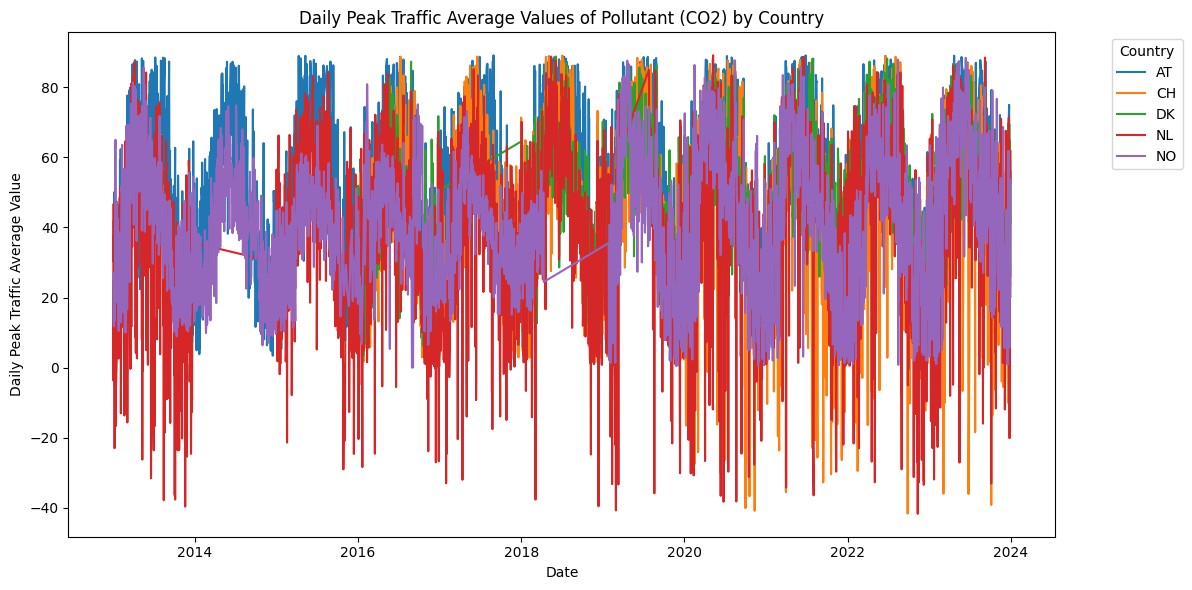

In [ ]:
# Filter data for a specific pollutant (e.g., NO2) for better visualization
pollutant_to_visualize = 7 # CO2
filtered_data = daily_peak_traffic_avg_per_country[daily_peak_traffic_avg_per_country['Pollutant'] == pollutant_to_visualize]

# Plot the data
plt.figure(figsize=(12, 6))
for country in filtered_data['Country'].unique():
    country_data = filtered_data[filtered_data['Country'] == country]
    plt.plot(country_data['Date'], country_data['DailyPeakTrafficAverageValue'], label=country)

plt.title('Daily Peak Traffic Average Values of Pollutant (CO2) by Country')
plt.xlabel('Date')
plt.ylabel('Daily Peak Traffic Average Value')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
pip install pandas pyarrow
import pandas as pd
import os

input_folder = "/Users/clarabottinelli/Desktop/PQ_downloads"
output_folder = "/Users/clarabottinelli/Desktop/CSV_downloads"

for file in os.listdir(input_folder):
    if file.endswith(".parquet"):
        df = pd.read_parquet(os.path.join(input_folder, file))
        csv_filename = file.replace(".parquet", ".csv")
        df.to_csv(os.path.join(output_folder, csv_filename), index=False)


In [ ]:
samplingpoint_data = {}

for csv_file in os.listdir(output_folder):
    if csv_file.endswith(".csv"):
        file_path = os.path.join(output_folder, csv_file)
        df = pd.read_csv(file_path)
        
        #group dataframe by Samplingpoint
        for samplingpoint, group in df.groupby("Samplingpoint"):
            if samplingpoint not in samplingpoint_data:
                samplingpoint_data[samplingpoint] = group
            else:
                samplingpoint_data[samplingpoint] = pd.concat([samplingpoint_data[samplingpoint], group], ignore_index=True)

#merge dataframe with datapoints for all Samplingpoints
merged_data = pd.concat(samplingpoint_data.values(), ignore_index=True)
merged_data

,Samplingpoint,Pollutant,Start,End,Value,Unit,AggType,Validity,Verification,ResultTime,DataCapture,FkObservationLog
0,NO/SPO_NO0073A_38_1785,38,2019-01-01 00:00:00,2019-01-01 01:00:00,-9900.0000,ug.m-3,hour,-1,1,2020-09-29 11:41:48,NaN,0fc404b0-e3c3-4118-bb62-c80ccfbb99a4
1,NO/SPO_NO0073A_38_1785,38,2019-01-01 01:00:00,2019-01-01 02:00:00,-9900.0000,ug.m-3,hour,-1,1,2020-09-29 11:41:48,NaN,0fc404b0-e3c3-4118-bb62-c80ccfbb99a4
2,NO/SPO_NO0073A_38_1785,38,2019-01-01 02:00:00,2019-01-01 03:00:00,-9900.0000,ug.m-3,hour,-1,1,2020-09-29 11:41:48,NaN,0fc404b0-e3c3-4118-bb62-c80ccfbb99a4
3,NO/SPO_NO0073A_38_1785,38,2019-01-01 03:00:00,2019-01-01 04:00:00,-9900.0000,ug.m-3,hour,-1,1,2020-09-29 11:41:48,NaN,0fc404b0-e3c3-4118-bb62-c80ccfbb99a4
4,NO/SPO_NO0073A_38_1785,38,2019-01-01 04:00:00,2019-01-01 05:00:00,-9900.0000,ug.m-3,hour,-1,1,2020-09-29 11:41:48,NaN,0fc404b0-e3c3-4118-bb62-c80ccfbb99a4
...,...,...,...,...,...,...,...,...,...,...,...,...
14847174,NL/SPO-NL00003_00009_101,9,2023-12-31 19:00:00,2023-12-31 20:00:00,5.4933,ug.m-3,hour,1,1,2024-12-11 14:58:11,NaN,ace1e0cc-9206-461d-a4b3-c9b0085599bd
14847175,NL/SPO-NL00003_00009_101,9,2023-12-31 20:00:00,2023-12-31 21:00:00,4.9933,ug.m-3,hour,1,1,2024-12-11 14:58:11,NaN,ace1e0cc-9206-461d-a4b3-c9b0085599bd
14847176,NL/SPO-NL00003_00009_101,9,2023-12-31 21:00:00,2023-12-31 22:00:00,5.6933,ug.m-3,hour,1,1,2024-12-11 14:58:11,NaN,ace1e0cc-9206-461d-a4b3-c9b0085599bd
14847177,NL/SPO-NL00003_00009_101,9,2023-12-31 22:00:00,2023-12-31 23:00:00,5.3933,ug.m-3,hour,1,1,2024-12-11 14:58:11,NaN,ace1e0cc-9206-461d-a4b3-c9b0085599bd


### Cleaning dataset

In [ ]:
#identify pollutants corresponding to IDs used by EEA
pollutant_codes = {
    5: "NO",
    7: "CO2",
    8: "NO2",
    9: "PM2.5",
    38: "PM10",
    6001: "NOX as NO2"
}

merged_data['Notation'] = merged_data['Pollutant'].map(pollutant_codes)
merged_data

,Samplingpoint,Pollutant,Start,End,Value,Unit,AggType,Validity,Verification,ResultTime,DataCapture,FkObservationLog,Notation
0,NO/SPO_NO0073A_38_1785,38,2019-01-01 00:00:00,2019-01-01 01:00:00,-9900.0000,ug.m-3,hour,-1,1,2020-09-29 11:41:48,NaN,0fc404b0-e3c3-4118-bb62-c80ccfbb99a4,PM10
1,NO/SPO_NO0073A_38_1785,38,2019-01-01 01:00:00,2019-01-01 02:00:00,-9900.0000,ug.m-3,hour,-1,1,2020-09-29 11:41:48,NaN,0fc404b0-e3c3-4118-bb62-c80ccfbb99a4,PM10
2,NO/SPO_NO0073A_38_1785,38,2019-01-01 02:00:00,2019-01-01 03:00:00,-9900.0000,ug.m-3,hour,-1,1,2020-09-29 11:41:48,NaN,0fc404b0-e3c3-4118-bb62-c80ccfbb99a4,PM10
3,NO/SPO_NO0073A_38_1785,38,2019-01-01 03:00:00,2019-01-01 04:00:00,-9900.0000,ug.m-3,hour,-1,1,2020-09-29 11:41:48,NaN,0fc404b0-e3c3-4118-bb62-c80ccfbb99a4,PM10
4,NO/SPO_NO0073A_38_1785,38,2019-01-01 04:00:00,2019-01-01 05:00:00,-9900.0000,ug.m-3,hour,-1,1,2020-09-29 11:41:48,NaN,0fc404b0-e3c3-4118-bb62-c80ccfbb99a4,PM10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14847174,NL/SPO-NL00003_00009_101,9,2023-12-31 19:00:00,2023-12-31 20:00:00,5.4933,ug.m-3,hour,1,1,2024-12-11 14:58:11,NaN,ace1e0cc-9206-461d-a4b3-c9b0085599bd,PM2.5
14847175,NL/SPO-NL00003_00009_101,9,2023-12-31 20:00:00,2023-12-31 21:00:00,4.9933,ug.m-3,hour,1,1,2024-12-11 14:58:11,NaN,ace1e0cc-9206-461d-a4b3-c9b0085599bd,PM2.5
14847176,NL/SPO-NL00003_00009_101,9,2023-12-31 21:00:00,2023-12-31 22:00:00,5.6933,ug.m-3,hour,1,1,2024-12-11 14:58:11,NaN,ace1e0cc-9206-461d-a4b3-c9b0085599bd,PM2.5
14847177,NL/SPO-NL00003_00009_101,9,2023-12-31 22:00:00,2023-12-31 23:00:00,5.3933,ug.m-3,hour,1,1,2024-12-11 14:58:11,NaN,ace1e0cc-9206-461d-a4b3-c9b0085599bd,PM2.5


In [ ]:
print(merged_data['Pollutant'].unique())

[  38    8    7    5 6001    9]


In [ ]:
#convert Start column to datetime and drop rows with NaT values
if not pd.api.types.is_datetime64_any_dtype(merged_data['Start']):
    merged_data['Start'] = pd.to_datetime(merged_data['Start'], errors='coerce', infer_datetime_format=True)

merged_data = merged_data.dropna(subset=['Start'])
merged_data

/var/folders/c8/hcty8r1j2xj189pdz208fpnr0000gn/T/ipykernel_81053/1018579409.py:3: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  merged_data['Start'] = pd.to_datetime(merged_data['Start'], errors='coerce', infer_datetime_format=True)


,Samplingpoint,Pollutant,Start,End,Value,Unit,AggType,Validity,Verification,ResultTime,DataCapture,FkObservationLog,Notation
0,NO/SPO_NO0073A_38_1785,38,2019-01-01 00:00:00,2019-01-01 01:00:00,-9900.0000,ug.m-3,hour,-1,1,2020-09-29 11:41:48,NaN,0fc404b0-e3c3-4118-bb62-c80ccfbb99a4,PM10
1,NO/SPO_NO0073A_38_1785,38,2019-01-01 01:00:00,2019-01-01 02:00:00,-9900.0000,ug.m-3,hour,-1,1,2020-09-29 11:41:48,NaN,0fc404b0-e3c3-4118-bb62-c80ccfbb99a4,PM10
2,NO/SPO_NO0073A_38_1785,38,2019-01-01 02:00:00,2019-01-01 03:00:00,-9900.0000,ug.m-3,hour,-1,1,2020-09-29 11:41:48,NaN,0fc404b0-e3c3-4118-bb62-c80ccfbb99a4,PM10
3,NO/SPO_NO0073A_38_1785,38,2019-01-01 03:00:00,2019-01-01 04:00:00,-9900.0000,ug.m-3,hour,-1,1,2020-09-29 11:41:48,NaN,0fc404b0-e3c3-4118-bb62-c80ccfbb99a4,PM10
4,NO/SPO_NO0073A_38_1785,38,2019-01-01 04:00:00,2019-01-01 05:00:00,-9900.0000,ug.m-3,hour,-1,1,2020-09-29 11:41:48,NaN,0fc404b0-e3c3-4118-bb62-c80ccfbb99a4,PM10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14847174,NL/SPO-NL00003_00009_101,9,2023-12-31 19:00:00,2023-12-31 20:00:00,5.4933,ug.m-3,hour,1,1,2024-12-11 14:58:11,NaN,ace1e0cc-9206-461d-a4b3-c9b0085599bd,PM2.5
14847175,NL/SPO-NL00003_00009_101,9,2023-12-31 20:00:00,2023-12-31 21:00:00,4.9933,ug.m-3,hour,1,1,2024-12-11 14:58:11,NaN,ace1e0cc-9206-461d-a4b3-c9b0085599bd,PM2.5
14847176,NL/SPO-NL00003_00009_101,9,2023-12-31 21:00:00,2023-12-31 22:00:00,5.6933,ug.m-3,hour,1,1,2024-12-11 14:58:11,NaN,ace1e0cc-9206-461d-a4b3-c9b0085599bd,PM2.5
14847177,NL/SPO-NL00003_00009_101,9,2023-12-31 22:00:00,2023-12-31 23:00:00,5.3933,ug.m-3,hour,1,1,2024-12-11 14:58:11,NaN,ace1e0cc-9206-461d-a4b3-c9b0085599bd,PM2.5


In [ ]:
#aggregate sampling points by country
merged_data.insert(0, 'Country', merged_data['Samplingpoint'].str[:2])
merged_data

,Country,Samplingpoint,Pollutant,Start,End,Value,Unit,AggType,Validity,Verification,ResultTime,DataCapture,FkObservationLog,Notation
0,NO,NO/SPO_NO0073A_38_1785,38,2019-01-01 00:00:00,2019-01-01 01:00:00,-9900.0000,ug.m-3,hour,-1,1,2020-09-29 11:41:48,NaN,0fc404b0-e3c3-4118-bb62-c80ccfbb99a4,PM10
1,NO,NO/SPO_NO0073A_38_1785,38,2019-01-01 01:00:00,2019-01-01 02:00:00,-9900.0000,ug.m-3,hour,-1,1,2020-09-29 11:41:48,NaN,0fc404b0-e3c3-4118-bb62-c80ccfbb99a4,PM10
2,NO,NO/SPO_NO0073A_38_1785,38,2019-01-01 02:00:00,2019-01-01 03:00:00,-9900.0000,ug.m-3,hour,-1,1,2020-09-29 11:41:48,NaN,0fc404b0-e3c3-4118-bb62-c80ccfbb99a4,PM10
3,NO,NO/SPO_NO0073A_38_1785,38,2019-01-01 03:00:00,2019-01-01 04:00:00,-9900.0000,ug.m-3,hour,-1,1,2020-09-29 11:41:48,NaN,0fc404b0-e3c3-4118-bb62-c80ccfbb99a4,PM10
4,NO,NO/SPO_NO0073A_38_1785,38,2019-01-01 04:00:00,2019-01-01 05:00:00,-9900.0000,ug.m-3,hour,-1,1,2020-09-29 11:41:48,NaN,0fc404b0-e3c3-4118-bb62-c80ccfbb99a4,PM10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14847174,NL,NL/SPO-NL00003_00009_101,9,2023-12-31 19:00:00,2023-12-31 20:00:00,5.4933,ug.m-3,hour,1,1,2024-12-11 14:58:11,NaN,ace1e0cc-9206-461d-a4b3-c9b0085599bd,PM2.5
14847175,NL,NL/SPO-NL00003_00009_101,9,2023-12-31 20:00:00,2023-12-31 21:00:00,4.9933,ug.m-3,hour,1,1,2024-12-11 14:58:11,NaN,ace1e0cc-9206-461d-a4b3-c9b0085599bd,PM2.5
14847176,NL,NL/SPO-NL00003_00009_101,9,2023-12-31 21:00:00,2023-12-31 22:00:00,5.6933,ug.m-3,hour,1,1,2024-12-11 14:58:11,NaN,ace1e0cc-9206-461d-a4b3-c9b0085599bd,PM2.5
14847177,NL,NL/SPO-NL00003_00009_101,9,2023-12-31 22:00:00,2023-12-31 23:00:00,5.3933,ug.m-3,hour,1,1,2024-12-11 14:58:11,NaN,ace1e0cc-9206-461d-a4b3-c9b0085599bd,PM2.5


In [ ]:
print(merged_data['Country'].value_counts())

Country
AT    4374113
NO    4167809
NL    3541104
CH    1972275
DK     712692
Name: count, dtype: int64


In [ ]:
#drop unnecessary columns
merged_data = merged_data.drop(columns=['ResultTime', 'DataCapture', 'FkObservationLog', 'Validity', 'Verification'])
# rename Notation column to Pollutant and remove pollutant column
merged_data = merged_data.rename(columns={'Notation': 'Pollutant'})
merged_data = merged_data.drop(columns=['Pollutant'])
merged_data

,Country,Samplingpoint,Pollutant,Start,End,Value,Unit,AggType,Notation
0,NO,NO/SPO_NO0073A_38_1785,38,2019-01-01 00:00:00,2019-01-01 01:00:00,-9900.0000,ug.m-3,hour,PM10
1,NO,NO/SPO_NO0073A_38_1785,38,2019-01-01 01:00:00,2019-01-01 02:00:00,-9900.0000,ug.m-3,hour,PM10
2,NO,NO/SPO_NO0073A_38_1785,38,2019-01-01 02:00:00,2019-01-01 03:00:00,-9900.0000,ug.m-3,hour,PM10
3,NO,NO/SPO_NO0073A_38_1785,38,2019-01-01 03:00:00,2019-01-01 04:00:00,-9900.0000,ug.m-3,hour,PM10
4,NO,NO/SPO_NO0073A_38_1785,38,2019-01-01 04:00:00,2019-01-01 05:00:00,-9900.0000,ug.m-3,hour,PM10
...,...,...,...,...,...,...,...,...,...
14847174,NL,NL/SPO-NL00003_00009_101,9,2023-12-31 19:00:00,2023-12-31 20:00:00,5.4933,ug.m-3,hour,PM2.5
14847175,NL,NL/SPO-NL00003_00009_101,9,2023-12-31 20:00:00,2023-12-31 21:00:00,4.9933,ug.m-3,hour,PM2.5
14847176,NL,NL/SPO-NL00003_00009_101,9,2023-12-31 21:00:00,2023-12-31 22:00:00,5.6933,ug.m-3,hour,PM2.5
14847177,NL,NL/SPO-NL00003_00009_101,9,2023-12-31 22:00:00,2023-12-31 23:00:00,5.3933,ug.m-3,hour,PM2.5


In [ ]:
merged_data

,Country,Samplingpoint,Pollutant,Start,End,Value,Unit,AggType,Notation
0,NO,NO/SPO_NO0073A_38_1785,38,2019-01-01 00:00:00,2019-01-01 01:00:00,-9900.0000,ug.m-3,hour,PM10
1,NO,NO/SPO_NO0073A_38_1785,38,2019-01-01 01:00:00,2019-01-01 02:00:00,-9900.0000,ug.m-3,hour,PM10
2,NO,NO/SPO_NO0073A_38_1785,38,2019-01-01 02:00:00,2019-01-01 03:00:00,-9900.0000,ug.m-3,hour,PM10
3,NO,NO/SPO_NO0073A_38_1785,38,2019-01-01 03:00:00,2019-01-01 04:00:00,-9900.0000,ug.m-3,hour,PM10
4,NO,NO/SPO_NO0073A_38_1785,38,2019-01-01 04:00:00,2019-01-01 05:00:00,-9900.0000,ug.m-3,hour,PM10
...,...,...,...,...,...,...,...,...,...
14847174,NL,NL/SPO-NL00003_00009_101,9,2023-12-31 19:00:00,2023-12-31 20:00:00,5.4933,ug.m-3,hour,PM2.5
14847175,NL,NL/SPO-NL00003_00009_101,9,2023-12-31 20:00:00,2023-12-31 21:00:00,4.9933,ug.m-3,hour,PM2.5
14847176,NL,NL/SPO-NL00003_00009_101,9,2023-12-31 21:00:00,2023-12-31 22:00:00,5.6933,ug.m-3,hour,PM2.5
14847177,NL,NL/SPO-NL00003_00009_101,9,2023-12-31 22:00:00,2023-12-31 23:00:00,5.3933,ug.m-3,hour,PM2.5


In [ ]:
output_csv_path = os.path.join(output_folder, "merged_data_export.csv")
merged_data.to_csv(output_csv_path, index=False)
print(f"Exported merged_data to {output_csv_path}")

Exported merged_data to /Users/clarabottinelli/Desktop/CSV_downloads/merged_data_export.csv


In [4]:
import pandas as pd
import numpy as np

# Load the merged air quality data
aq_df = pd.read_csv("../data/processed/AQ_merged_data_export.csv")

# Drop unnecessary columns
aq_cleaned = aq_df.drop(columns=['Samplingpoint', 'Pollutant', 'AggType'], errors='ignore')

# Keep only the 'End' column for datetime
aq_cleaned = aq_cleaned.rename(columns={'End': 'Datetime'})
if 'Start' in aq_cleaned.columns:
    aq_cleaned = aq_cleaned.drop(columns=['Start'])

# Convert 'Datetime' to pandas datetime
aq_cleaned['Datetime'] = pd.to_datetime(aq_cleaned['Datetime'], errors='coerce')
aq_cleaned = aq_cleaned.dropna(subset=['Datetime'])

# Extract date and hour for grouping
aq_cleaned['Date'] = aq_cleaned['Datetime'].dt.date
aq_cleaned['Hour'] = aq_cleaned['Datetime'].dt.hour

In [5]:
# Count NaN values for each Country and Notation
nan_counts = aq_cleaned.groupby(['Country', 'Notation'])['Value'].apply(lambda x: x.isna().sum()).reset_index(name='NaN_Count')

# Count negative values for each Country and Notation
neg_counts = aq_cleaned.groupby(['Country', 'Notation'])['Value'].apply(lambda x: (x < 0).sum()).reset_index(name='Negative_Count')

# Merge the two counts
value_issues = nan_counts.merge(neg_counts, on=['Country', 'Notation'])
print(value_issues)

   Country    Notation  NaN_Count  Negative_Count
0       AT         CO2          0              30
1       AT          NO          0               0
2       AT         NO2          0              34
3       AT  NOX as NO2          0               0
4       AT        PM10          0           14258
5       CH         CO2          0            2520
6       CH         NO2          0            2397
7       CH        PM10          0            4196
8       CH       PM2.5          0            2395
9       DK         CO2          0              33
10      DK          NO          0               0
11      DK         NO2          0              59
12      DK  NOX as NO2          0               9
13      DK        PM10          0            3871
14      DK       PM2.5          0              19
15      NL         CO2          0            9529
16      NL          NO          0           21599
17      NL         NO2          0           13531
18      NL  NOX as NO2          0           23066


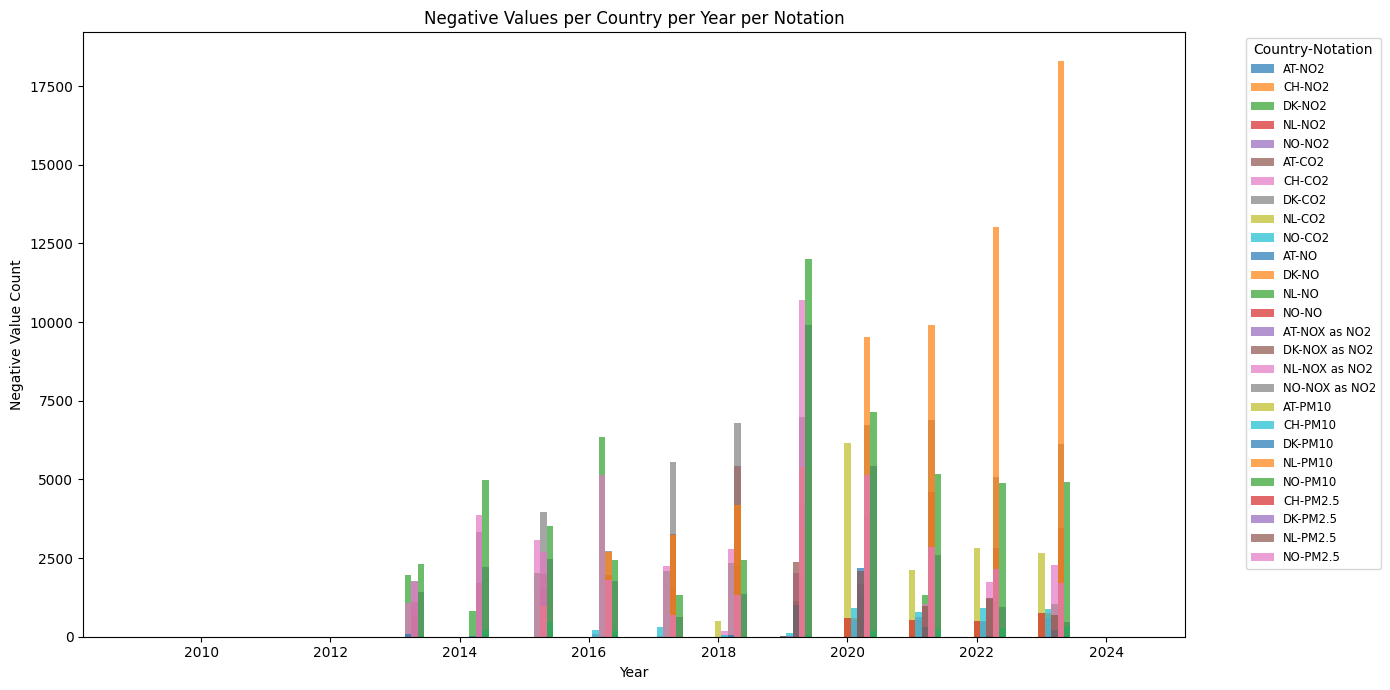

   Country    Notation  negative_proportion  nan_proportion
0       AT         CO2             0.000064             0.0
1       AT          NO             0.000000             0.0
2       AT         NO2             0.000023             0.0
3       AT  NOX as NO2             0.000000             0.0
4       AT        PM10             0.036029             0.0
5       CH         CO2             0.005343             0.0
6       CH         NO2             0.005086             0.0
7       CH        PM10             0.008903             0.0
8       CH       PM2.5             0.004291             0.0
9       DK         CO2             0.000269             0.0
10      DK          NO             0.000000             0.0
11      DK         NO2             0.000321             0.0
12      DK  NOX as NO2             0.000148             0.0
13      DK        PM10             0.024030             0.0
14      DK       PM2.5             0.000155             0.0
15      NL         CO2             0.036

In [7]:
import matplotlib.pyplot as plt

# from the datetime column, extract the year
aq_cleaned['Year'] = aq_cleaned['Datetime'].dt.year

# Calculate negative and NaN counts per Country, Year, Notation
neg_nan_stats = (
    aq_cleaned
    .groupby(['Country', 'Year', 'Notation'])
    .agg(
        total=('Value', 'size'),
        negative=('Value', lambda x: (x < 0).sum()),
        nan=('Value', lambda x: x.isna().sum())
    )
    .reset_index()
)

# Plot negative values per country per year per notation
fig, ax = plt.subplots(figsize=(14, 7))
for notation in neg_nan_stats['Notation'].unique():
    subset = neg_nan_stats[neg_nan_stats['Notation'] == notation]
    for country in subset['Country'].unique():
        country_data = subset[subset['Country'] == country]
        ax.bar(
            country_data['Year'] + (0.1 * list(subset['Country'].unique()).index(country)),
            country_data['negative'],
            width=0.1,
            label=f"{country}-{notation}" if notation == subset['Notation'].unique()[0] else "",
            alpha=0.7
        )
ax.set_xlabel('Year')
ax.set_ylabel('Negative Value Count')
ax.set_title('Negative Values per Country per Year per Notation')
ax.legend(title='Country-Notation', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')
plt.tight_layout()
plt.show()

# Calculate proportion of negative/NaN values per country per notation
prop_stats = (
    aq_cleaned
    .groupby(['Country', 'Notation'])
    .agg(
        total=('Value', 'size'),
        negative=('Value', lambda x: (x < 0).sum()),
        nan=('Value', lambda x: x.isna().sum())
    )
    .reset_index()
)
prop_stats['negative_proportion'] = prop_stats['negative'] / prop_stats['total']
prop_stats['nan_proportion'] = prop_stats['nan'] / prop_stats['total']

print(prop_stats[['Country', 'Notation', 'negative_proportion', 'nan_proportion']])

A non-trivial proportion (2–8%) of negative values in air quality data for pollutants like PM2.5, PM10, NO2, NO, CO2 is a common issue in environmental monitoring datasets. Here are the main reasons:

1. Instrument Noise and Detection Limits
Air quality sensors (especially for low concentrations) have a certain level of measurement noise.
When the true concentration is near zero, random fluctuations and instrument noise can result in negative readings.
This is especially true for automated, continuous analyzers (e.g., chemiluminescence for NOx, beta attenuation for PM).
2. Baseline Correction and Drift
Many instruments perform baseline or zero-point corrections. If the baseline is overestimated, actual readings can dip below zero.
Drift in instrument calibration over time can also cause negative values.
3. Data Processing and Averaging
Negative values can arise when averaging several low or noisy measurements (e.g., hourly or daily means).
Some data processing pipelines do not filter or correct negative values, especially if the negative values are within the instrument's stated uncertainty.
4. Quality Control Flags
Sometimes, negative values are left in the dataset to flag questionable or below-detection-limit data rather than being set to zero or marked as missing.
This allows downstream users to decide how to handle them.
5. Physical Meaning
Negative concentrations are not physically meaningful; they are always an artifact of measurement or processing.

For most analyses, negative values should be set to zero, treated as missing, or otherwise flagged, depending on your scientific question and the recommendations of the data provider.
In our case, the increasing number of negative values across the years would correspond very well with situations in which air quality improves. We therefore choose to set the values to 0.

References:
US EPA Air Sensor Guidebook (see "Negative Values")
EEA Air Quality Data Quality Control

In [11]:
# set Notation column name to 'Pollutant'
aq_cleaned = aq_cleaned.rename(columns={'Notation': 'Pollutant'})
aq_cleaned

,Country,Datetime,Value,Unit,Pollutant,Date,Hour,Year
0,NO,2019-01-01 01:00:00,-9900.0000,ug.m-3,PM10,2019-01-01,1,2019
1,NO,2019-01-01 02:00:00,-9900.0000,ug.m-3,PM10,2019-01-01,2,2019
2,NO,2019-01-01 03:00:00,-9900.0000,ug.m-3,PM10,2019-01-01,3,2019
3,NO,2019-01-01 04:00:00,-9900.0000,ug.m-3,PM10,2019-01-01,4,2019
4,NO,2019-01-01 05:00:00,-9900.0000,ug.m-3,PM10,2019-01-01,5,2019
...,...,...,...,...,...,...,...,...
14767988,NL,2023-12-31 20:00:00,5.4933,ug.m-3,PM2.5,2023-12-31,20,2023
14767989,NL,2023-12-31 21:00:00,4.9933,ug.m-3,PM2.5,2023-12-31,21,2023
14767990,NL,2023-12-31 22:00:00,5.6933,ug.m-3,PM2.5,2023-12-31,22,2023
14767991,NL,2023-12-31 23:00:00,5.3933,ug.m-3,PM2.5,2023-12-31,23,2023


In [15]:
# Set negative (measurement error) values to 0
aq_cleaned.loc[aq_cleaned['Value'] < 0, 'Value'] = 0

# Check if any negative values remain
print("Negative values remaining:", (aq_cleaned['Value'] < 0).sum())

Negative values remaining: 0


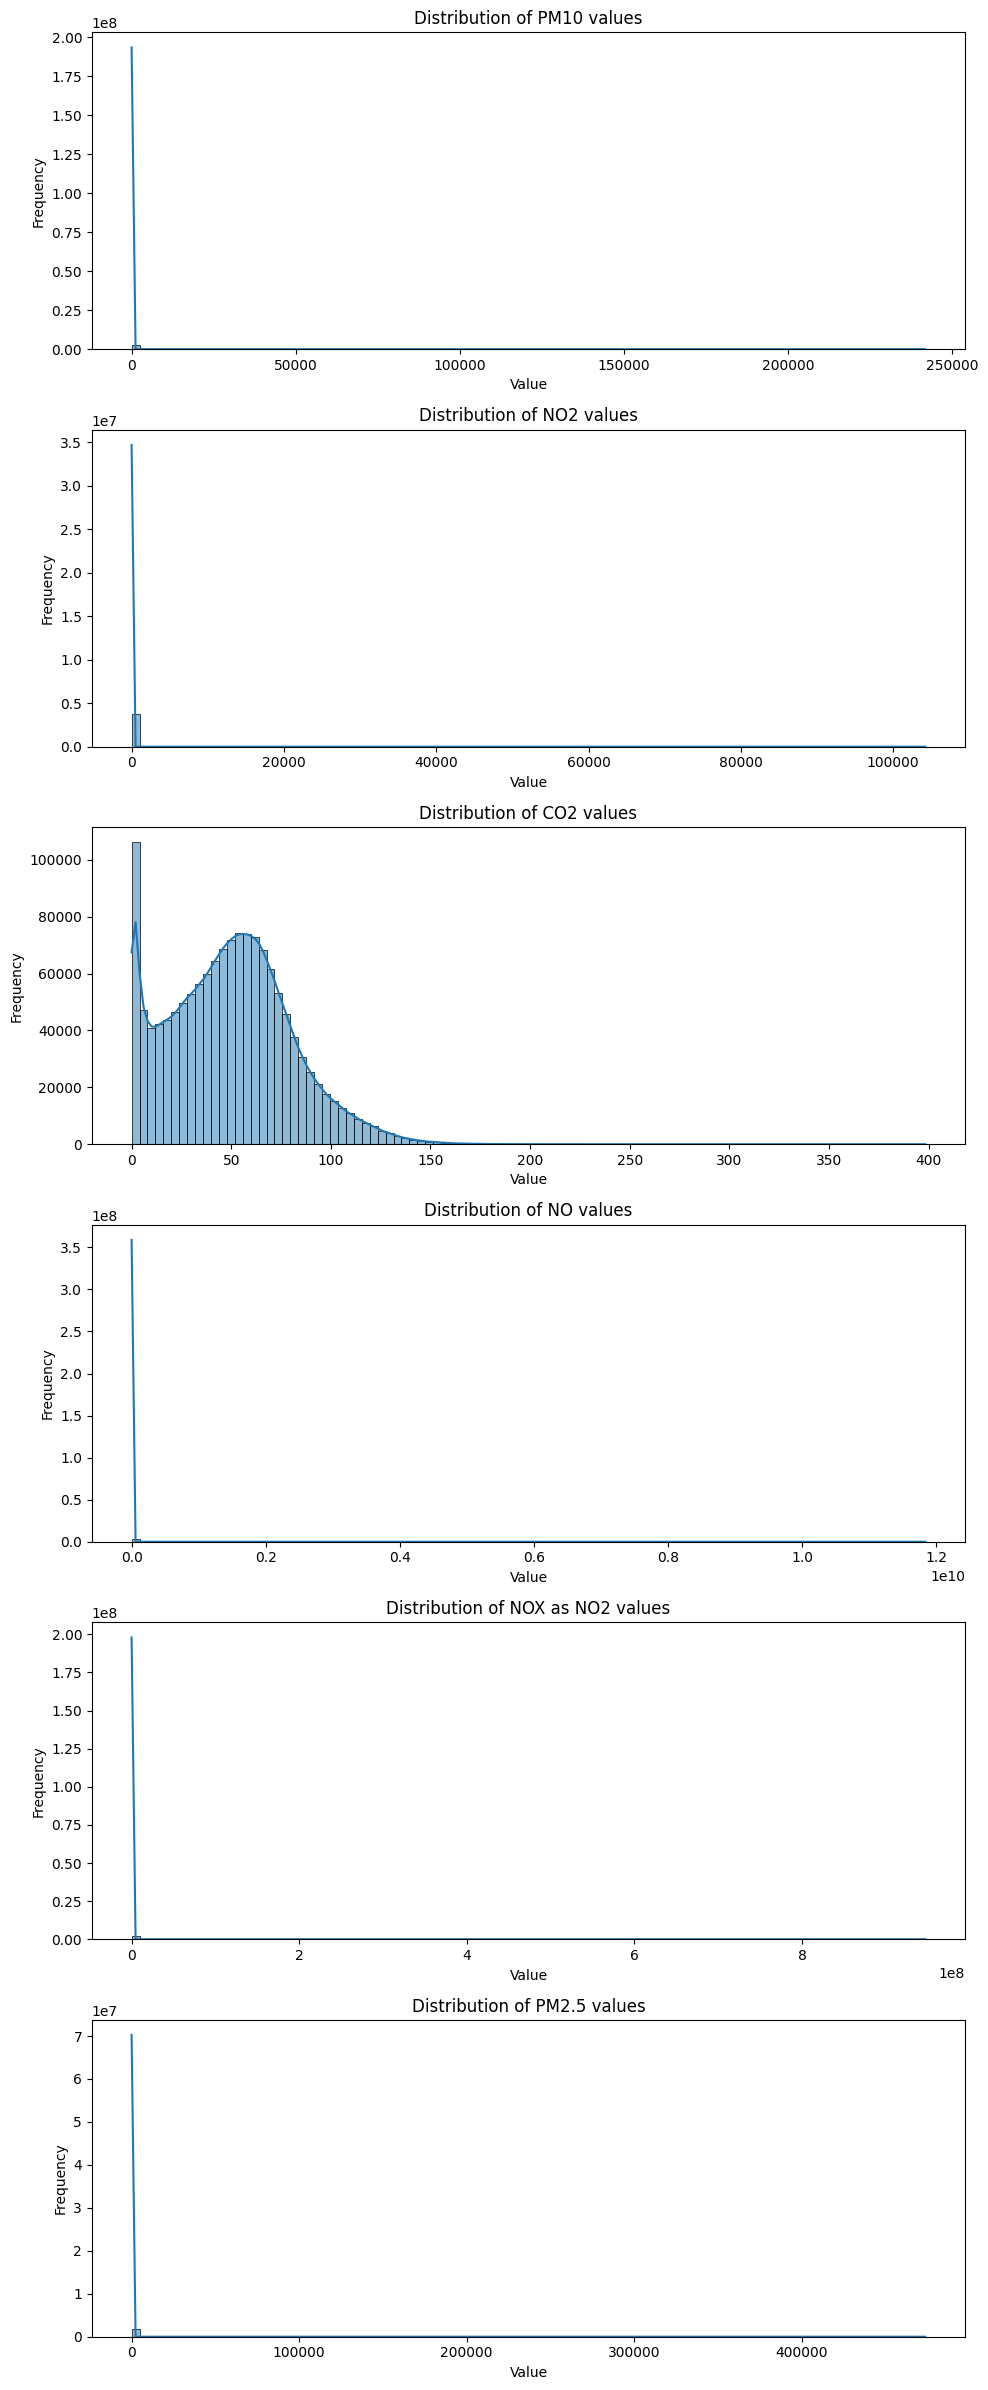

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot distribution for each pollutant to visually inspect outliers
pollutants = aq_cleaned['Pollutant'].unique()
fig, axes = plt.subplots(len(pollutants), 1, figsize=(10, 4 * len(pollutants)), sharex=False)

for i, pollutant in enumerate(pollutants):
    ax = axes[i] if len(pollutants) > 1 else axes
    sns.histplot(
        aq_cleaned[aq_cleaned['Pollutant'] == pollutant]['Value'],
        bins=100, kde=True, ax=ax
    )
    ax.set_title(f'Distribution of {pollutant} values')
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [20]:
aq_cleaned.to_csv("../data/processed/AQ_cleaned.csv", index=False)
print("aq_cleaned exported to ../data/processed/AQ_cleaned.csv")

KeyboardInterrupt: 

In [17]:
# Daily average per country
daily_avg = aq_cleaned.groupby(['Country', 'Date', 'Pollutant'])['Value'].mean().reset_index()
daily_avg = daily_avg.rename(columns={'Value': 'Daily_Avg'})

# Daytime average (9-18 End time, i.e., 8-17 actual hour)
daytime_mask = aq_cleaned['Hour'].between(9, 18)
daytime_avg = aq_cleaned[daytime_mask].groupby(['Country', 'Date', 'Pollutant'])['Value'].mean().reset_index()
daytime_avg = daytime_avg.rename(columns={'Value': 'Daytime_Avg'})

# Rush-hour average (8-10 and 15-18 End time, i.e., 7-9 and 15-17 actual hour)
rush_mask = (aq_cleaned['Hour'].between(8, 10)) | (aq_cleaned['Hour'].between(15, 18))
rush_avg = aq_cleaned[rush_mask].groupby(['Country', 'Date', 'Pollutant'])['Value'].mean().reset_index()
rush_avg = rush_avg.rename(columns={'Value': 'RushHour_Avg'})

# Merge all averages into one DataFrame
aq_merged_cleaned = daily_avg.merge(daytime_avg, on=['Country', 'Date', 'Pollutant'], how='left')
aq_merged_cleaned = aq_merged_cleaned.merge(rush_avg, on=['Country', 'Date', 'Pollutant'], how='left')

# Save the cleaned dataset
aq_merged_cleaned.to_csv("../data/processed/AQ_merged_cleaned.csv", index=False)

print(aq_merged_cleaned.head())

  Country        Date   Pollutant  Daily_Avg  Daytime_Avg  RushHour_Avg
0      AT  2009-01-01         NO2  35.525558          NaN           NaN
1      AT  2013-01-01         CO2  35.851000    38.626760     37.535657
2      AT  2013-01-01          NO  80.641822    52.104975     51.446887
3      AT  2013-01-01         NO2  26.560859    22.000584     24.580176
4      AT  2013-01-01  NOX as NO2  53.923347    45.303470     44.564314


## Annual averages (weekdays, rush-hours, weekend)

In [ ]:
import pandas as pd
import numpy as np

# Load the merged air quality data
aq_df = pd.read_csv("../data/processed/AQ_cleaned.csv")

# Prepare datetime and helper columns
aq_df['Datetime'] = pd.to_datetime(aq_df['End'], errors='coerce')
aq_df = aq_df.dropna(subset=['Datetime'])
aq_df['Year'] = aq_df['Datetime'].dt.year
aq_df['Hour'] = aq_df['Datetime'].dt.hour
aq_df['Weekday'] = aq_df['Datetime'].dt.weekday  # 0=Monday, ..., 6=Sunday
aq_df['IsWeekend'] = aq_df['Weekday'] >= 5

# Helper masks
daytime_mask = aq_df['Hour'].between(9, 18)  # End time 9-18 (i.e., 8-17 actual hour)
rush_mask = (aq_df['Hour'].between(8, 10)) | (aq_df['Hour'].between(16, 18))  # End time 8-10, 15-18

def annual_avg(df, mask, period):
    # period: 'fullweek', 'weekday', 'weekend'
    if period == 'weekday':
        df = df[~df['IsWeekend']]
    elif period == 'weekend':
        df = df[df['IsWeekend']]
    df = df[mask]
    return (
        df.groupby(['Country', 'Pollutant', 'Year'])['Value']
        .mean()
        .reset_index()
        .rename(columns={'Value': f'AnnualAvg_{period}'})
    )

# Compute all combinations
results = []

for period in ['fullweek', 'weekday', 'weekend']:
    # Daytime
    dt_avg = annual_avg(aq_df, daytime_mask, period)
    dt_avg['Type'] = 'Daytime'
    results.append(dt_avg)
    # Rush-hour
    rh_avg = annual_avg(aq_df, rush_mask, period)
    rh_avg['Type'] = 'RushHour'
    results.append(rh_avg)

# Concatenate and pivot for clarity
annual_averages = pd.concat(results, ignore_index=True)
annual_averages = annual_averages.pivot_table(
    index=['Country', 'Pollutant', 'Year'],
    columns=['Type'],
    values=['AnnualAvg_fullweek', 'AnnualAvg_weekday', 'AnnualAvg_weekend']
).reset_index()

# Flatten columns
annual_averages.columns = ['_'.join([str(i) for i in col if i]) for col in annual_averages.columns.values]

# rename Pollutant column to 'Pollutant'
annual_averages = annual_averages.rename(columns={'Pollutant': 'Pollutant'})

# Save to processed folder
annual_averages.to_csv("../data/processed/AQ_annual_averages.csv", index=False)

print(annual_averages.head())

KeyboardInterrupt: 

### 24h average

In [ ]:
# Create a copy of merged_data
merged_data_copy = merged_data.copy()

# Compute daily average of Value for each Pollutant per Country
daily_avg_per_country = (
    merged_data_copy.groupby(['Country', 'Pollutant', 'Start'])['Value']
    .mean()
    .reset_index()
    .rename(columns={'Value': 'DailyAverageValue'})
)

daily_avg_per_country

,Country,Pollutant,Start,DailyAverageValue
0,AT,5,2013-01-01 00:00:00,319.393036
1,AT,5,2013-01-01 01:00:00,297.272252
2,AT,5,2013-01-01 02:00:00,158.900503
3,AT,5,2013-01-01 03:00:00,86.559707
4,AT,5,2013-01-01 04:00:00,59.949791
...,...,...,...,...
2209673,NO,6001,2023-12-31 19:00:00,3.906768
2209674,NO,6001,2023-12-31 20:00:00,4.139576
2209675,NO,6001,2023-12-31 21:00:00,3.564156
2209676,NO,6001,2023-12-31 22:00:00,2.909819


In [ ]:
#summary statistics of daily average values
daily_avg_per_country.describe()

,Pollutant,Start,DailyAverageValue
count,2.209678e+06,2209678,2.209678e+06
mean,9.384940e+02,2019-02-05 11:19:44.730623488,-1.413213e+03
min,5.000000e+00,2008-12-31 23:00:00,-1.167965e+09
25%,7.000000e+00,2016-08-27 19:15:00,6.201582e+00
50%,8.000000e+00,2019-04-30 23:00:00,1.658283e+01
75%,3.800000e+01,2021-08-30 11:00:00,3.630217e+01
max,6.001000e+03,2023-12-31 23:00:00,1.183894e+09
std,2.163275e+03,NaN,1.573824e+06


In [ ]:
# don't think we need to get rid of outliers necessarily
#getting rid of outliers
Q1 = daily_avg_per_country['DailyAverageValue'].quantile(0.25)
Q3 = daily_avg_per_country['DailyAverageValue'].quantile(0.75)

IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

daily_avg_per_country = daily_avg_per_country[
    (daily_avg_per_country['DailyAverageValue'] >= lower_bound) &
    (daily_avg_per_country['DailyAverageValue'] <= upper_bound)
]

daily_avg_per_country

,Country,Pollutant,Start,DailyAverageValue
4,AT,5,2013-01-01 04:00:00,59.949791
5,AT,5,2013-01-01 05:00:00,52.924208
6,AT,5,2013-01-01 06:00:00,49.834083
7,AT,5,2013-01-01 07:00:00,49.908625
8,AT,5,2013-01-01 08:00:00,51.497500
...,...,...,...,...
2209673,NO,6001,2023-12-31 19:00:00,3.906768
2209674,NO,6001,2023-12-31 20:00:00,4.139576
2209675,NO,6001,2023-12-31 21:00:00,3.564156
2209676,NO,6001,2023-12-31 22:00:00,2.909819


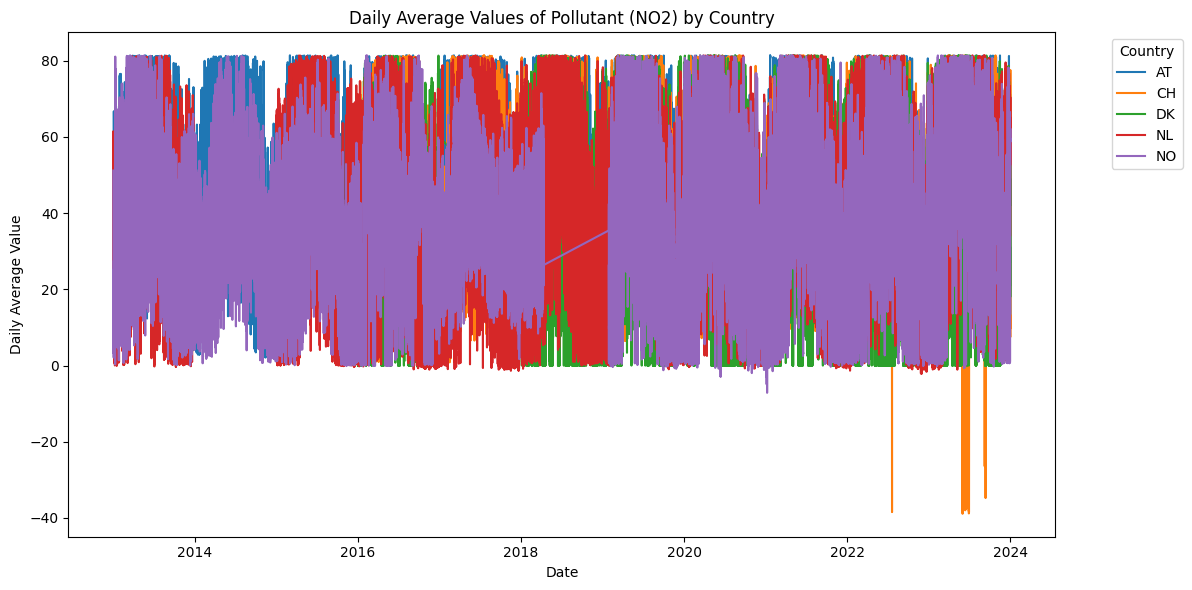

In [ ]:
import matplotlib.pyplot as plt

# Filter data for a specific pollutant (e.g., NO2) for better visualization
pollutant_to_visualize = 7 # NO2
filtered_data = daily_avg_per_country[daily_avg_per_country['Pollutant'] == pollutant_to_visualize]

# Plot the data
plt.figure(figsize=(12, 6))
for country in filtered_data['Country'].unique():
    country_data = filtered_data[filtered_data['Country'] == country]
    plt.plot(country_data['Start'], country_data['DailyAverageValue'], label=country)

plt.title('Daily Average Values of Pollutant (NO2) by Country')
plt.xlabel('Date')
plt.ylabel('Daily Average Value')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### Day-time avg

In [ ]:
# Filter data for day-time values (08:00:00 to 20:00:00)
day_time_data = merged_data[
    (merged_data['Start'].dt.time >= pd.to_datetime('08:00:00').time()) &
    (merged_data['Start'].dt.time <= pd.to_datetime('20:00:00').time())
]

# Compute daily mean for each pollutant value for each country
daily_daytime_avg_per_country = (
    day_time_data.groupby(['Country', 'Pollutant', day_time_data['Start'].dt.date])['Value']
    .mean()
    .reset_index()
    .rename(columns={'Start': 'Date', 'Value': 'DailyDaytimeAverageValue'})
)

daily_daytime_avg_per_country

,Country,Pollutant,Date,DailyDaytimeAverageValue
0,AT,5,2013-01-01,52.110413
1,AT,5,2013-01-02,25.221235
2,AT,5,2013-01-03,9.707832
3,AT,5,2013-01-04,9.635445
4,AT,5,2013-01-05,3.943111
...,...,...,...,...
92072,NO,6001,2023-12-27,-39.505708
92073,NO,6001,2023-12-28,7.945569
92074,NO,6001,2023-12-29,6.633458
92075,NO,6001,2023-12-30,10.783207


In [ ]:
#summary statistics
summary_stats = daily_daytime_avg_per_country['DailyDaytimeAverageValue'].describe()
print(summary_stats)

#remove outliers
Q1 = daily_daytime_avg_per_country['DailyDaytimeAverageValue'].quantile(0.25)
Q3 = daily_daytime_avg_per_country['DailyDaytimeAverageValue'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

daily_daytime_avg_per_country = daily_daytime_avg_per_country[
    (daily_daytime_avg_per_country['DailyDaytimeAverageValue'] >= lower_bound) &
    (daily_daytime_avg_per_country['DailyDaytimeAverageValue'] <= upper_bound)
]

daily_daytime_avg_per_country

count    9.207700e+04
mean    -1.309438e+03
std      4.640776e+05
min     -1.399059e+08
25%      6.921385e+00
50%      1.860801e+01
75%      4.005826e+01
max      1.245011e+07
Name: DailyDaytimeAverageValue, dtype: float64


,Country,Pollutant,Date,DailyDaytimeAverageValue
0,AT,5,2013-01-01,52.110413
1,AT,5,2013-01-02,25.221235
2,AT,5,2013-01-03,9.707832
3,AT,5,2013-01-04,9.635445
4,AT,5,2013-01-05,3.943111
...,...,...,...,...
92072,NO,6001,2023-12-27,-39.505708
92073,NO,6001,2023-12-28,7.945569
92074,NO,6001,2023-12-29,6.633458
92075,NO,6001,2023-12-30,10.783207


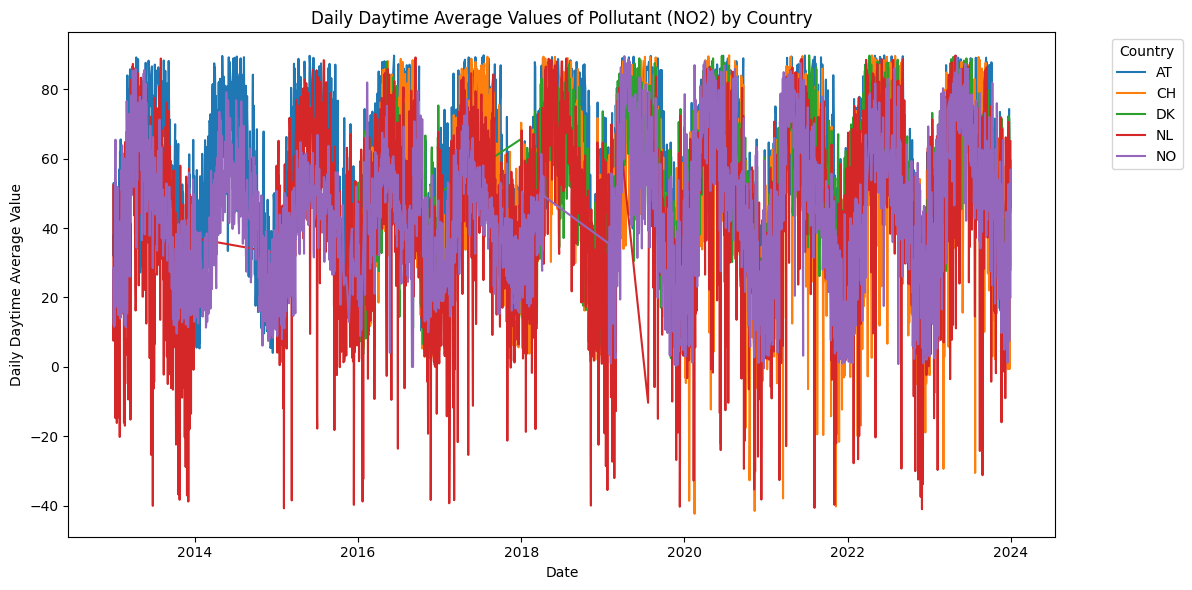

In [ ]:
import matplotlib.pyplot as plt

# Filter data for a specific pollutant (e.g., NO2) for better visualization
pollutant_to_visualize = 7  # NO2
filtered_data = daily_daytime_avg_per_country[daily_daytime_avg_per_country['Pollutant'] == pollutant_to_visualize]

# Plot the data
plt.figure(figsize=(12, 6))
for country in filtered_data['Country'].unique():
    country_data = filtered_data[filtered_data['Country'] == country]
    plt.plot(country_data['Date'], country_data['DailyDaytimeAverageValue'], label=country)

plt.title('Daily Daytime Average Values of Pollutant (NO2) by Country')
plt.xlabel('Date')
plt.ylabel('Daily Daytime Average Value')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### Peak-traffic hour windows

In [ ]:
# Filter data for the specified time ranges
peak_traffic_data = merged_data[
    ((merged_data['Start'].dt.time >= pd.to_datetime('06:00:00').time()) & 
     (merged_data['Start'].dt.time <= pd.to_datetime('10:00:00').time())) |
    ((merged_data['Start'].dt.time >= pd.to_datetime('16:00:00').time()) & 
     (merged_data['Start'].dt.time <= pd.to_datetime('20:00:00').time()))
]

# Compute daily mean for each pollutant value for each country
daily_peak_traffic_avg_per_country = (
    peak_traffic_data.groupby(['Country', 'Pollutant', peak_traffic_data['Start'].dt.date])['Value']
    .mean()
    .reset_index()
    .rename(columns={'Start': 'Date', 'Value': 'DailyPeakTrafficAverageValue'})
)

daily_peak_traffic_avg_per_country

,Country,Pollutant,Date,DailyPeakTrafficAverageValue
0,AT,5,2013-01-01,51.586312
1,AT,5,2013-01-02,31.677111
2,AT,5,2013-01-03,12.501949
3,AT,5,2013-01-04,8.393159
4,AT,5,2013-01-05,3.950906
...,...,...,...,...
92073,NO,6001,2023-12-27,22.545110
92074,NO,6001,2023-12-28,9.120578
92075,NO,6001,2023-12-29,7.111636
92076,NO,6001,2023-12-30,9.878856


In [ ]:
# Generate summary statistics
summary_stats = daily_peak_traffic_avg_per_country['DailyPeakTrafficAverageValue'].describe()
print(summary_stats)

# Remove outliers using the IQR method
Q1 = daily_peak_traffic_avg_per_country['DailyPeakTrafficAverageValue'].quantile(0.25)
Q3 = daily_peak_traffic_avg_per_country['DailyPeakTrafficAverageValue'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

daily_peak_traffic_avg_per_country = daily_peak_traffic_avg_per_country[
    (daily_peak_traffic_avg_per_country['DailyPeakTrafficAverageValue'] >= lower_bound) &
    (daily_peak_traffic_avg_per_country['DailyPeakTrafficAverageValue'] <= upper_bound)
]

daily_peak_traffic_avg_per_country

count    9.207800e+04
mean    -3.375996e+02
std      1.958049e+05
min     -5.595444e+07
25%      7.274157e+00
50%      1.918641e+01
75%      4.003498e+01
max      1.552745e+07
Name: DailyPeakTrafficAverageValue, dtype: float64


,Country,Pollutant,Date,DailyPeakTrafficAverageValue
0,AT,5,2013-01-01,51.586312
1,AT,5,2013-01-02,31.677111
2,AT,5,2013-01-03,12.501949
3,AT,5,2013-01-04,8.393159
4,AT,5,2013-01-05,3.950906
...,...,...,...,...
92073,NO,6001,2023-12-27,22.545110
92074,NO,6001,2023-12-28,9.120578
92075,NO,6001,2023-12-29,7.111636
92076,NO,6001,2023-12-30,9.878856


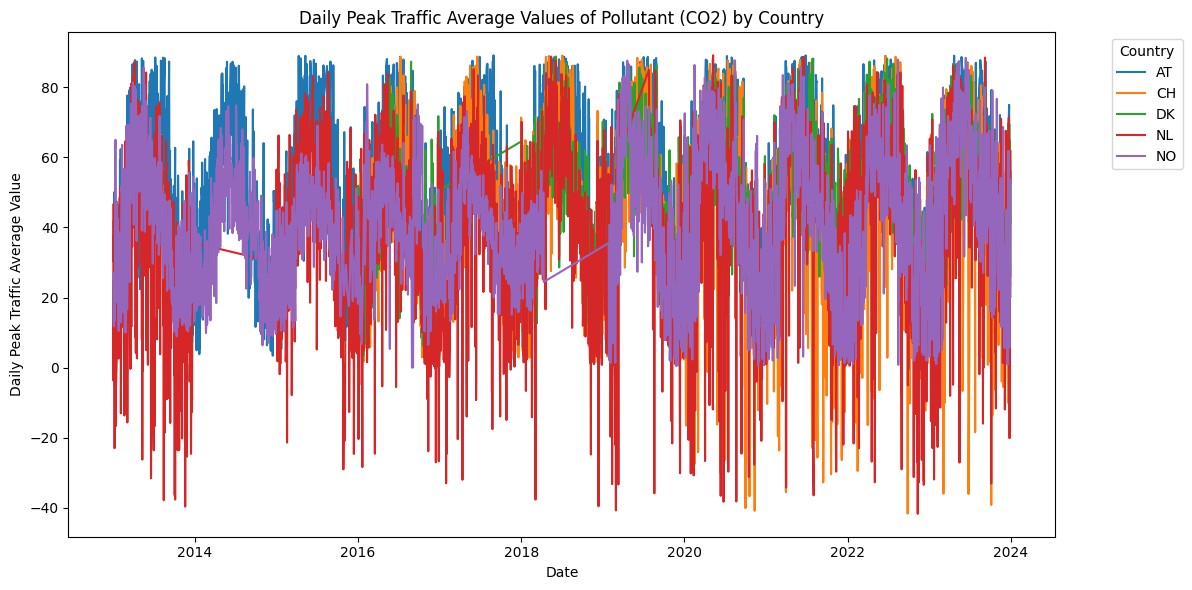

In [ ]:
# Filter data for a specific pollutant (e.g., NO2) for better visualization
pollutant_to_visualize = 7 # CO2
filtered_data = daily_peak_traffic_avg_per_country[daily_peak_traffic_avg_per_country['Pollutant'] == pollutant_to_visualize]

# Plot the data
plt.figure(figsize=(12, 6))
for country in filtered_data['Country'].unique():
    country_data = filtered_data[filtered_data['Country'] == country]
    plt.plot(country_data['Date'], country_data['DailyPeakTrafficAverageValue'], label=country)

plt.title('Daily Peak Traffic Average Values of Pollutant (CO2) by Country')
plt.xlabel('Date')
plt.ylabel('Daily Peak Traffic Average Value')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()